# Coronavirus Disease (COVID-19)

https://github.com/owid/covid-19-data/tree/master/public/data/
https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import warnings
from IPython import display

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('display.precision', 5)
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')                                              

# Import Image

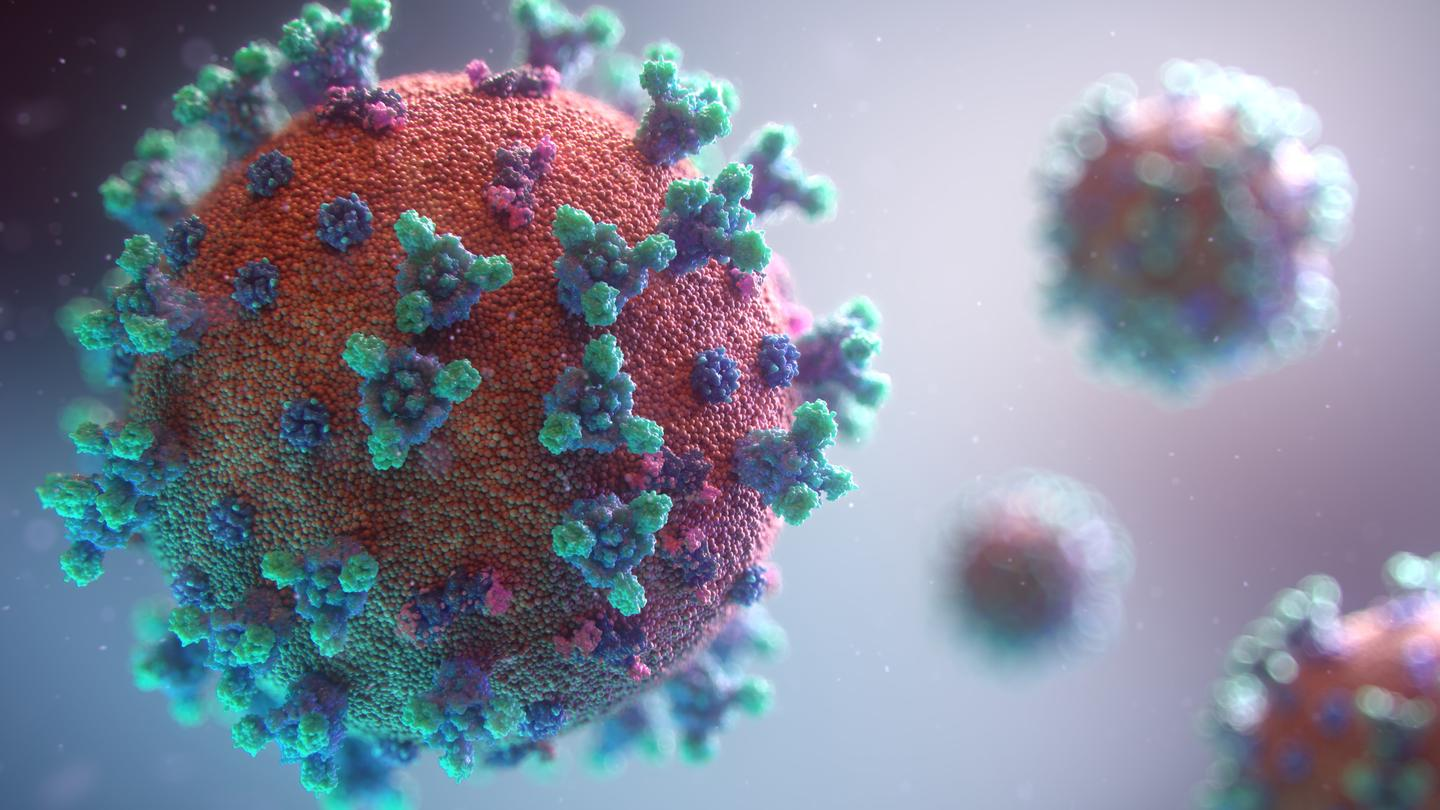

In [3]:
# get current working directory
path_directory = os.getcwd()  

image_path = os.path.join(path_directory, 'images', 'Covid 19.jpg')

display.Image(image_path)

# Fetch Data

In [4]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(url)

# Head and Tail

In [5]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   
1                     NaN                              NaN                NaN   
2                     NaN                              NaN                NaN   
3                     NaN                              NaN                NaN   
4                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN          NaN        NaN   
1                                 NaN          NaN        NaN   
2                                 NaN          NaN        NaN   
3                                 NaN          NaN        NaN   
4                                 NaN          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_

In [6]:
df.shape

(206615, 67)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206615 entries, 0 to 206614
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    206615 non-null  object 
 1   continent                                   194670 non-null  object 
 2   location                                    206615 non-null  object 
 3   date                                        206615 non-null  object 
 4   total_cases                                 198242 non-null  float64
 5   new_cases                                   198016 non-null  float64
 6   new_cases_smoothed                          196839 non-null  float64
 7   total_deaths                                179472 non-null  float64
 8   new_deaths                                  179452 non-null  float64
 9   new_deaths_smoothed                         178285 non-null  float64
 

In [8]:
df.dtypes.value_counts()

float64    62
object      5
dtype: int64

In [9]:
df['iso_code'].value_counts(ascending=False).head(10)                     # explore the top ten count for different iso codes

ARG         948
MEX         948
THA         945
TWN         933
MAC         927
OWID_WRL    927
OWID_UMC    927
KOR         927
CHN         927
USA         927
Name: iso_code, dtype: int64

In [10]:
df['continent'].value_counts()                                                                            

Africa           47833
Europe           44854
Asia             44541
North America    31924
Oceania          14012
South America    11506
Name: continent, dtype: int64

In [11]:
round(df['continent'].value_counts(True), 3)                              # calculate the relative frequencies for each continent                        

Africa           0.246
Europe           0.230
Asia             0.229
North America    0.164
Oceania          0.072
South America    0.059
Name: continent, dtype: float64

(-1.1360352392360613,
 1.3076381010036644,
 -1.1138673103586512,
 1.107161279753292)

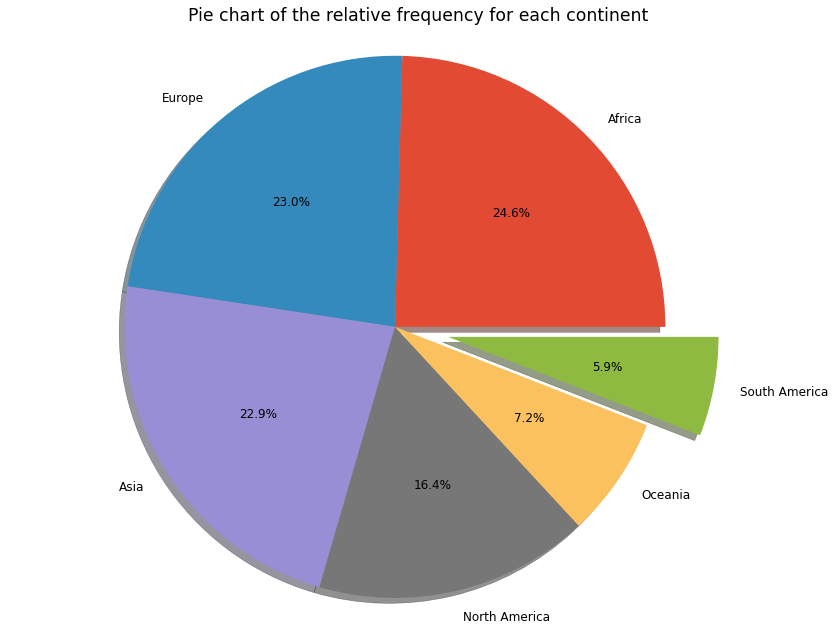

In [12]:
fig, ax = plt.subplots()

plt.pie(
              x=df['continent'].value_counts(True).values, labels=df['continent'].value_counts(True).keys(),
              autopct='%1.1f%%', shadow=True, 
              explode=[0, 0, 0, 0, 0, 0.2]
            )

ax.set(title='Pie chart of the relative frequency for each continent')
ax.axis('equal')

In [13]:
df['location'].value_counts().head(10)

Argentina              948
Mexico                 948
Thailand               945
Taiwan                 933
Macao                  927
World                  927
Upper middle income    927
South Korea            927
China                  927
United States          927
Name: location, dtype: int64

In [14]:
df.describe(include='object')

iso_code continent   location        date      tests_units
count    206615    194670     206615      206615           106786
unique      244         6        244         948                4
top         ARG    Africa  Argentina  2021-09-01  tests performed
freq        948     47833        948         243            80097

In [15]:
df.describe(include='float64')

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98242e+05  1.98016e+05         1.96839e+05   1.79472e+05   
mean   3.80979e+06  1.25682e+04         1.25685e+04   6.89886e+04   
std    2.39162e+07  8.72569e+04         8.51972e+04   3.57505e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.38600e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.14045e+04  6.50000e+01         1.00429e+02   1.02800e+03   
75%    4.44820e+05  1.01300e+03         1.14936e+03   9.08200e+03   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179452.00000         178285.00000             197331.00000   
mean      148.33301            149.04243              49937.36460   
std       761.53068            745.04735              91169.97422   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                907.74750   
50%         1.00000              1.71400               8126.87200   
75%        16.00000             17.28600              61325.59350   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197105.00000                    195933.00000   
mean               188.90571                       188.85692   
std                917.61513                       599.53654   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48700   
50%                  9.24800                        19.92800   
75%                102.51000                       135.56500   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              178574.00000            178554.00000   
mean                  637.10105                 1.50098   
std                   925.14925                 5.26594   
min                     0.00000                 0.00000   
25%                    26.27500                 0.00000   
50%                   184.15050                 0.05900   
75%                   945.83000                 1.09900   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177392.00000       155030.00000   27319.00000   
mean                           1.50030            0.96596     859.54296   
std                            3.45364            0.38095    2502.62502   
min                            0.00000           -0.05000       0.00000   
25%                            0.00600            0.77000      33.00000   
50%                            0.23300            0.98000     171.00000   
75%                            1.48900            1.17000     619.50000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27319.00000    29243.00000                29243.00000   
mean                   22.24794     4210.02086                  160.30982   
std                    26.72818    10975.54772                  195.88015   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      163.00000                   31.32850   
50%                    11.83800      813.00000                   89.33700   
75%                    31.60200     3199.00000                  207.79250   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6772.00000                         6772.00000   
mean               439.54209                           13.71724   
std                595.11913                           15.44971   
min             

In [16]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))            # convert date to pandas datetime
df.select_dtypes(include='datetime')

date
0      2020-02-24
1      2020-02-25
2      2020-02-26
3      2020-02-27
4      2020-02-28
...           ...
206610 2022-08-01
206611 2022-08-02
206612 2022-08-03
206613 2022-08-04
206614 2022-08-05

[206615 rows x 1 columns]

In [17]:
df['day_name'] = df['date'].dt.day_name()                                    # add name of the day
df['day'] = df['date'].dt.day                                                # day
df['month_num'] = df['date'].dt.month                                        # add month number
df['year'] =  df['date'].dt.year                                             # year

df[['year', 'month_num', 'day', 'day_name']]

year  month_num  day   day_name
0       2020          2   24     Monday
1       2020          2   25    Tuesday
2       2020          2   26  Wednesday
3       2020          2   27   Thursday
4       2020          2   28     Friday
...      ...        ...  ...        ...
206610  2022          8    1     Monday
206611  2022          8    2    Tuesday
206612  2022          8    3  Wednesday
206613  2022          8    4   Thursday
206614  2022          8    5     Friday

[206615 rows x 4 columns]

In [18]:
# assign month names
def assign_month_name(x):
  if x == 1:
    return 'Jan'
  elif x == 2:
    return 'Feb'
  elif x == 3:
     return 'Mar'
  elif x == 4:
    return 'Apr'
  elif x == 5:
    return 'May'
  elif x == 6:
     return 'June'
  elif x == 7:
    return 'July'
  elif x == 8:
    return 'Aug'
  elif x == 9:
    return 'Sep'
  elif x == 10:
    return 'Oct'
  elif x == 11:
    return 'Nov'
  else:
    return 'Dec'

df['month_name'] = df['month_num'].apply(assign_month_name)
df['month_name'].value_counts()

July    21601
May     21595
June    20971
Apr     20655
Mar     19558
Aug     15570
Jan     14887
Feb     14736
Dec     14512
Oct     14479
Nov     14070
Sep     13981
Name: month_name, dtype: int64

In [19]:
# change month name to categorical 
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['month_name'] = pd.Categorical(df['month_name'], ordered_months)

df['month_name'].dtype

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
, ordered=False)

[Text(0.5, 1.0, 'Total count by month name'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Month Name')]

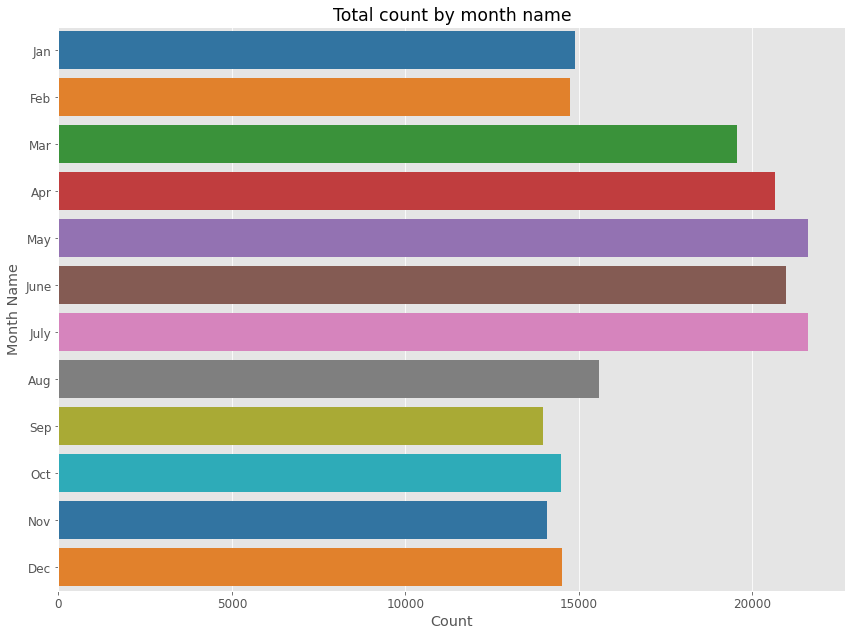

In [20]:
fig, ax = plt.subplots()

sns.countplot(data=df, y='month_name', hue_order='month_name', palette='tab10')

ax.set(title='Total count by month name', xlabel='Count',  ylabel='Month Name')

# Missing Data Exploration

In [21]:
df.isna().sum()                                             # over 50 % missing data in some columns

iso_code                                           0
continent                                      11945
location                                           0
date                                               0
total_cases                                     8373
new_cases                                       8599
new_cases_smoothed                              9776
total_deaths                                   27143
new_deaths                                     27163
new_deaths_smoothed                            28330
total_cases_per_million                         9284
new_cases_per_million                           9510
new_cases_smoothed_per_million                 10682
total_deaths_per_million                       28041
new_deaths_per_million                         28061
new_deaths_smoothed_per_million                29223
reproduction_rate                              51585
icu_patients                                  179296
icu_patients_per_million                      

<AxesSubplot:>

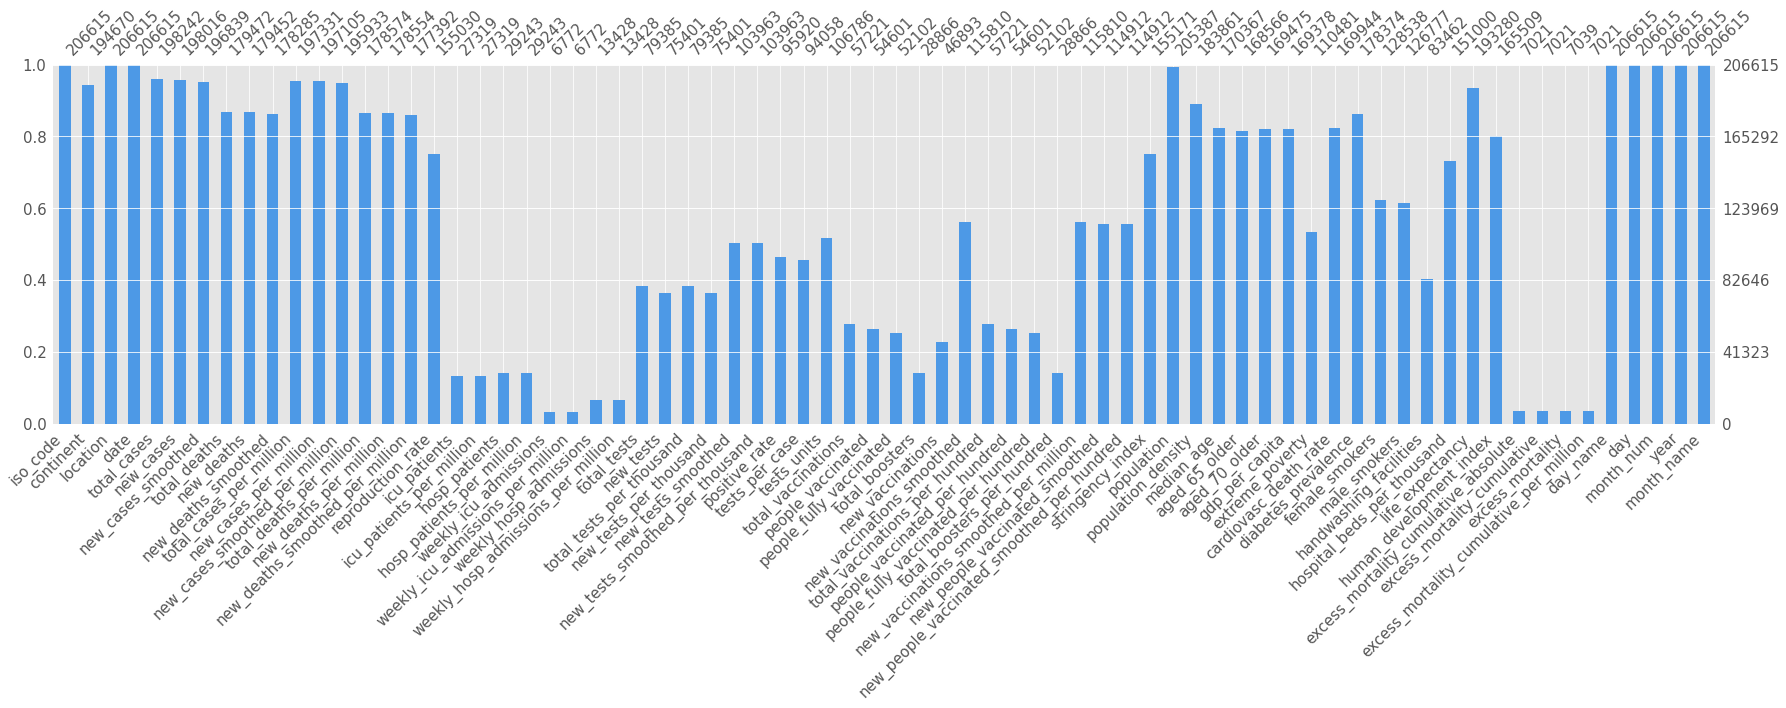

In [22]:
msno.bar(df, labels=True, figsize=(25, 10), fontsize=15, color=(0.3, 0.6, 0.9))                    # plot missing values for each column

<AxesSubplot:>

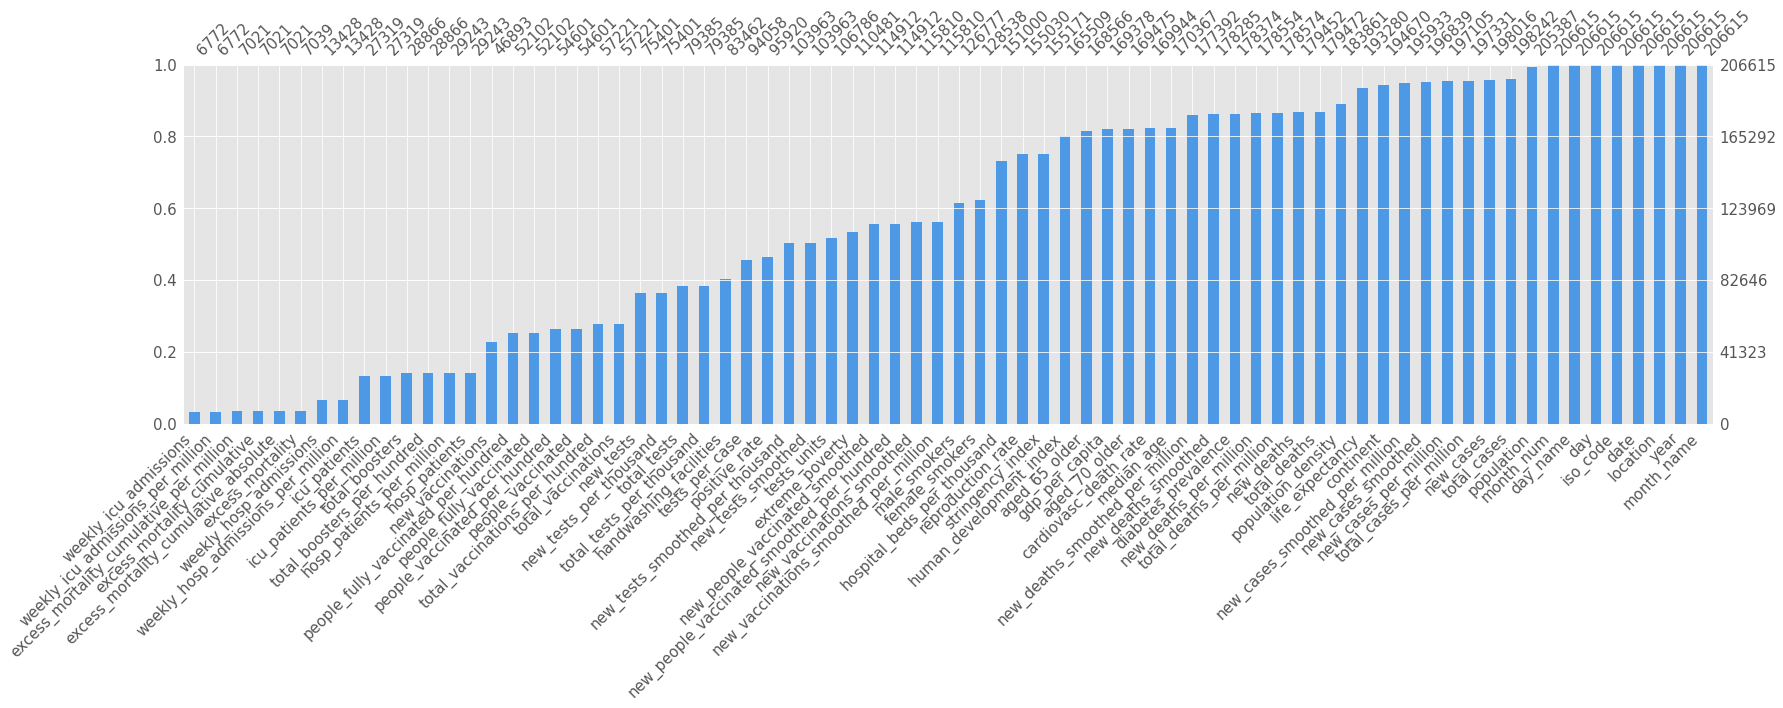

In [23]:
msno.bar(df, labels=True, figsize=(25, 10), fontsize=15, color=(0.3, 0.6, 0.9), sort='ascending') 

In [24]:
# filter for missing values based on the column with the highest values missing
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
206610      ZWE    Africa     Zimbabwe 2022-08-01     256382.0        4.0   
206611      ZWE    Africa     Zimbabwe 2022-08-02     256403.0       21.0   
206612      ZWE    Africa     Zimbabwe 2022-08-03     256423.0       20.0   
206613      ZWE    Africa     Zimbabwe 2022-08-04     256444.0       21.0   
206614      ZWE    Africa     Zimbabwe 2022-08-05     256444.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
206610              16.000        5577.0         0.0                0.714   
206611              17.000        5578.0         1.0                0.571   
206612              15.429        5579.0         1.0                0.714   
206613              15.429        5581.0         2.0                0.714   
206614               9.714        5581.0         0.0                0.571   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
206610                16030.363                  0.250   
206611                16031.676                  1.313   
206612                16032.927                  1.251   
206613                16034.240                  1.313   
206614                16034.240                  0.000   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
206610                           1.000                   348.704   
206611                           1.063                   348.766   
206612                           0.965                   348.829   
206613                           0.965                   348.954   
206614                           0.607                   348.954   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
206610                   0.000                            0.045   
206611                   0.063                            0.036   
206612                   0.063          

Common strategies that can be used to handle missing data for this project may include:
1) ignoring the missing data
2) dropping records with missing data
3) filling the missing data

In [25]:
# droping missing data based on rows containing missing values results in an empty dataframe   
df.dropna(axis='index')

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million, day_name, day, month_num, year, month_name]
Index: []

In [26]:
# dropping missing values based on columns also returns an a smaller dataframe as almost all columns contains a missing value
df.dropna(axis='columns')

iso_code     location       date   day_name  day  month_num  year  \
0           AFG  Afghanistan 2020-02-24     Monday   24          2  2020   
1           AFG  Afghanistan 2020-02-25    Tuesday   25          2  2020   
2           AFG  Afghanistan 2020-02-26  Wednesday   26          2  2020   
3           AFG  Afghanistan 2020-02-27   Thursday   27          2  2020   
4           AFG  Afghanistan 2020-02-28     Friday   28          2  2020   
...         ...          ...        ...        ...  ...        ...   ...   
206610      ZWE     Zimbabwe 2022-08-01     Monday    1          8  2022   
206611      ZWE     Zimbabwe 2022-08-02    Tuesday    2          8  2022   
206612      ZWE     Zimbabwe 2022-08-03  Wednesday    3          8  2022   
206613      ZWE     Zimbabwe 2022-08-04   Thursday    4          8  2022   
206614      ZWE     Zimbabwe 2022-08-05     Friday    5          8  2022   

       month_name  
0             Feb  
1             Feb  
2             Feb  
3             Feb  
4             Feb  
...           ...  
206610        Aug  
206611        Aug  
206612        Aug  
206613        Aug  
206614        Aug  

[206615 rows x 8 columns]

Filling the missing data

In [27]:
# filling missing values with a constant value will not be a good decision for instance in total cases or deaths that varies for different locations
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
206610      ZWE    Africa     Zimbabwe 2022-08-01     256382.0        4.0   
206611      ZWE    Africa     Zimbabwe 2022-08-02     256403.0       21.0   
206612      ZWE    Africa     Zimbabwe 2022-08-03     256423.0       20.0   
206613      ZWE    Africa     Zimbabwe 2022-08-04     256444.0       21.0   
206614      ZWE    Africa     Zimbabwe 2022-08-05     256444.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
206610              16.000        5577.0         0.0                0.714   
206611              17.000        5578.0         1.0                0.571   
206612              15.429        5579.0         1.0                0.714   
206613              15.429        5581.0         2.0                0.714   
206614               9.714        5581.0         0.0                0.571   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
206610                16030.363                  0.250   
206611                16031.676                  1.313   
206612                16032.927                  1.251   
206613                16034.240                  1.313   
206614                16034.240                  0.000   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
206610                           1.000                   348.704   
206611                           1.063                   348.766   
206612                           0.965                   348.829   
206613                           0.965                   348.954   
206614                           0.607                   348.954   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
206610                   0.000                            0.045   
206611                   0.063                            0.036   
206612                   0.063          

Filling with either mean or median produces almost the same output as the dataframe with missing values

In [28]:
# filling missing values with mean
values_mean = {
  'total_cases': df['total_cases'].mean(), 
  'total_deaths': df['total_deaths'].mean(), 
  'population': df['population'].mean(), 
  'gdp_per_capita': df['gdp_per_capita'].mean()
  }

df.loc[df['weekly_icu_admissions'].isnull()].fillna(values_mean).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.99843e+05  1.91273e+05         1.90106e+05   1.99843e+05   
mean   3.79490e+06  1.23860e+04         1.23869e+04   6.97063e+04   
std    2.37908e+07  8.84060e+04         8.63914e+04   3.38650e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.56000e+03  0.00000e+00         6.00000e+00   1.27000e+02   
50%    4.46620e+04  5.50000e+01         8.62860e+01   1.86700e+03   
75%    5.15645e+05  8.65000e+02         9.55107e+02   2.86680e+04   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  172759.00000         171628.00000             190567.00000   
mean      151.05013            151.76407              46923.98098   
std       775.56878            758.89753              87938.87815   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                846.90400   
50%         1.00000              1.57100               7044.41700   
75%        14.00000             15.00000              56567.64000   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           190362.00000                    189200.00000   
mean               177.58396                       176.85789   
std                912.60864                       584.38473   
min                  0.00000                         0.00000   
25%                  0.00000                         1.33500   
50%                  7.88400                        17.36200   
75%                 91.48850                       123.00625   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              171845.00000            171861.00000   
mean                  607.90382                 1.46283   
std                   912.07158                 5.31923   
min                     0.00000                 0.00000   
25%                    24.55300                 0.00000   
50%                   170.69700                 0.04500   
75%                   886.67200                 1.00900   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     170735.00000       148304.00000   21137.00000   
mean                           1.45830            0.96163     819.12230   
std                            3.45984            0.38366    2771.07615   
min                            0.00000           -0.05000       0.00000   
25%                            0.00200            0.77000      27.00000   
50%                            0.20800            0.98000     122.00000   
75%                            1.38900            1.16000     442.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               21137.00000    24017.00000                24017.00000   
mean                   19.73072     3789.87396                  158.25888   
std                    24.46356    11437.57515                  202.56446   
min                     0.00000        0.00000                    0.00000   
25%                     3.25100      134.00000                   28.81700   
50%                     9.84000      667.00000                   82.77200   
75%                    26.92300     2542.00000                  201.71700   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count                    0.0                                0.0   
mean                     NaN                                NaN   
std                      NaN                                NaN   
min             

In [29]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98242e+05  1.98016e+05         1.96839e+05   1.79472e+05   
mean   3.80979e+06  1.25682e+04         1.25685e+04   6.89886e+04   
std    2.39162e+07  8.72569e+04         8.51972e+04   3.57505e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.38600e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.14045e+04  6.50000e+01         1.00429e+02   1.02800e+03   
75%    4.44820e+05  1.01300e+03         1.14936e+03   9.08200e+03   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179452.00000         178285.00000             197331.00000   
mean      148.33301            149.04243              49937.36460   
std       761.53068            745.04735              91169.97422   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                907.74750   
50%         1.00000              1.71400               8126.87200   
75%        16.00000             17.28600              61325.59350   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197105.00000                    195933.00000   
mean               188.90571                       188.85692   
std                917.61513                       599.53654   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48700   
50%                  9.24800                        19.92800   
75%                102.51000                       135.56500   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              178574.00000            178554.00000   
mean                  637.10105                 1.50098   
std                   925.14925                 5.26594   
min                     0.00000                 0.00000   
25%                    26.27500                 0.00000   
50%                   184.15050                 0.05900   
75%                   945.83000                 1.09900   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177392.00000       155030.00000   27319.00000   
mean                           1.50030            0.96596     859.54296   
std                            3.45364            0.38095    2502.62502   
min                            0.00000           -0.05000       0.00000   
25%                            0.00600            0.77000      33.00000   
50%                            0.23300            0.98000     171.00000   
75%                            1.48900            1.17000     619.50000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27319.00000    29243.00000                29243.00000   
mean                   22.24794     4210.02086                  160.30982   
std                    26.72818    10975.54772                  195.88015   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      163.00000                   31.32850   
50%                    11.83800      813.00000                   89.33700   
75%                    31.60200     3199.00000                  207.79250   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6772.00000                         6772.00000   
mean               439.54209                           13.71724   
std                595.11913                           15.44971   
min             

In [30]:
# filling missing values with median of column
values_median = {
  'total_cases': df['total_cases'].median(), 
  'total_deaths': df['total_deaths'].median(), 
  'population': df['population'].median(), 
  'gdp_per_capita': df['gdp_per_capita'].median()
  }

df.loc[df['weekly_icu_admissions'].isnull()].fillna(values_median).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.99843e+05  1.91273e+05         1.90106e+05   1.99843e+05   
mean   3.63717e+06  1.23860e+04         1.23869e+04   6.04904e+04   
std    2.38027e+07  8.84060e+04         8.63914e+04   3.39468e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.56000e+03  0.00000e+00         6.00000e+00   1.27000e+02   
50%    4.14045e+04  5.50000e+01         8.62860e+01   1.02800e+03   
75%    3.35686e+05  8.65000e+02         9.55107e+02   5.64900e+03   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  172759.00000         171628.00000             190567.00000   
mean      151.05013            151.76407              46923.98098   
std       775.56878            758.89753              87938.87815   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                846.90400   
50%         1.00000              1.57100               7044.41700   
75%        14.00000             15.00000              56567.64000   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           190362.00000                    189200.00000   
mean               177.58396                       176.85789   
std                912.60864                       584.38473   
min                  0.00000                         0.00000   
25%                  0.00000                         1.33500   
50%                  7.88400                        17.36200   
75%                 91.48850                       123.00625   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              171845.00000            171861.00000   
mean                  607.90382                 1.46283   
std                   912.07158                 5.31923   
min                     0.00000                 0.00000   
25%                    24.55300                 0.00000   
50%                   170.69700                 0.04500   
75%                   886.67200                 1.00900   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     170735.00000       148304.00000   21137.00000   
mean                           1.45830            0.96163     819.12230   
std                            3.45984            0.38366    2771.07615   
min                            0.00000           -0.05000       0.00000   
25%                            0.00200            0.77000      27.00000   
50%                            0.20800            0.98000     122.00000   
75%                            1.38900            1.16000     442.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               21137.00000    24017.00000                24017.00000   
mean                   19.73072     3789.87396                  158.25888   
std                    24.46356    11437.57515                  202.56446   
min                     0.00000        0.00000                    0.00000   
25%                     3.25100      134.00000                   28.81700   
50%                     9.84000      667.00000                   82.77200   
75%                    26.92300     2542.00000                  201.71700   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count                    0.0                                0.0   
mean                     NaN                                NaN   
std                      NaN                                NaN   
min             

In [31]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98242e+05  1.98016e+05         1.96839e+05   1.79472e+05   
mean   3.80979e+06  1.25682e+04         1.25685e+04   6.89886e+04   
std    2.39162e+07  8.72569e+04         8.51972e+04   3.57505e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.38600e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.14045e+04  6.50000e+01         1.00429e+02   1.02800e+03   
75%    4.44820e+05  1.01300e+03         1.14936e+03   9.08200e+03   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179452.00000         178285.00000             197331.00000   
mean      148.33301            149.04243              49937.36460   
std       761.53068            745.04735              91169.97422   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                907.74750   
50%         1.00000              1.71400               8126.87200   
75%        16.00000             17.28600              61325.59350   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197105.00000                    195933.00000   
mean               188.90571                       188.85692   
std                917.61513                       599.53654   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48700   
50%                  9.24800                        19.92800   
75%                102.51000                       135.56500   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              178574.00000            178554.00000   
mean                  637.10105                 1.50098   
std                   925.14925                 5.26594   
min                     0.00000                 0.00000   
25%                    26.27500                 0.00000   
50%                   184.15050                 0.05900   
75%                   945.83000                 1.09900   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177392.00000       155030.00000   27319.00000   
mean                           1.50030            0.96596     859.54296   
std                            3.45364            0.38095    2502.62502   
min                            0.00000           -0.05000       0.00000   
25%                            0.00600            0.77000      33.00000   
50%                            0.23300            0.98000     171.00000   
75%                            1.48900            1.17000     619.50000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27319.00000    29243.00000                29243.00000   
mean                   22.24794     4210.02086                  160.30982   
std                    26.72818    10975.54772                  195.88015   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      163.00000                   31.32850   
50%                    11.83800      813.00000                   89.33700   
75%                    31.60200     3199.00000                  207.79250   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6772.00000                         6772.00000   
mean               439.54209                           13.71724   
std                595.11913                           15.44971   
min             

Fill with Mean / Median of Group

In [32]:
values_grpd_mean = {
  'total_cases': df[['location', 'total_cases']].groupby('location')['total_cases'].transform('mean'),
  'total_deaths': df[['location', 'total_deaths']].groupby('location')['total_deaths'].transform('mean'),
  'population': df[['location', 'population']].groupby('location')['population'].transform('mean'),
  'gdp_per_capita': df[['location', 'gdp_per_capita']].groupby('location')['gdp_per_capita'].transform('mean')
  }

df.loc[df['weekly_icu_admissions'].isnull()].fillna(values_grpd_mean).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.93033e+05  1.91273e+05         1.90106e+05   1.89777e+05   
mean   3.76756e+06  1.23860e+04         1.23869e+04   6.46545e+04   
std    2.42096e+07  8.84060e+04         8.63914e+04   3.48706e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    2.88400e+03  0.00000e+00         6.00000e+00   7.40000e+01   
50%    3.61500e+04  5.50000e+01         8.62860e+01   7.37000e+02   
75%    3.71021e+05  8.65000e+02         9.55107e+02   6.87500e+03   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  172759.00000         171628.00000             190567.00000   
mean      151.05013            151.76407              46923.98098   
std       775.56878            758.89753              87938.87815   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                846.90400   
50%         1.00000              1.57100               7044.41700   
75%        14.00000             15.00000              56567.64000   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           190362.00000                    189200.00000   
mean               177.58396                       176.85789   
std                912.60864                       584.38473   
min                  0.00000                         0.00000   
25%                  0.00000                         1.33500   
50%                  7.88400                        17.36200   
75%                 91.48850                       123.00625   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              171845.00000            171861.00000   
mean                  607.90382                 1.46283   
std                   912.07158                 5.31923   
min                     0.00000                 0.00000   
25%                    24.55300                 0.00000   
50%                   170.69700                 0.04500   
75%                   886.67200                 1.00900   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     170735.00000       148304.00000   21137.00000   
mean                           1.45830            0.96163     819.12230   
std                            3.45984            0.38366    2771.07615   
min                            0.00000           -0.05000       0.00000   
25%                            0.00200            0.77000      27.00000   
50%                            0.20800            0.98000     122.00000   
75%                            1.38900            1.16000     442.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               21137.00000    24017.00000                24017.00000   
mean                   19.73072     3789.87396                  158.25888   
std                    24.46356    11437.57515                  202.56446   
min                     0.00000        0.00000                    0.00000   
25%                     3.25100      134.00000                   28.81700   
50%                     9.84000      667.00000                   82.77200   
75%                    26.92300     2542.00000                  201.71700   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count                    0.0                                0.0   
mean                     NaN                                NaN   
std                      NaN                                NaN   
min             

In [33]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98242e+05  1.98016e+05         1.96839e+05   1.79472e+05   
mean   3.80979e+06  1.25682e+04         1.25685e+04   6.89886e+04   
std    2.39162e+07  8.72569e+04         8.51972e+04   3.57505e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.38600e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.14045e+04  6.50000e+01         1.00429e+02   1.02800e+03   
75%    4.44820e+05  1.01300e+03         1.14936e+03   9.08200e+03   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179452.00000         178285.00000             197331.00000   
mean      148.33301            149.04243              49937.36460   
std       761.53068            745.04735              91169.97422   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                907.74750   
50%         1.00000              1.71400               8126.87200   
75%        16.00000             17.28600              61325.59350   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197105.00000                    195933.00000   
mean               188.90571                       188.85692   
std                917.61513                       599.53654   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48700   
50%                  9.24800                        19.92800   
75%                102.51000                       135.56500   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              178574.00000            178554.00000   
mean                  637.10105                 1.50098   
std                   925.14925                 5.26594   
min                     0.00000                 0.00000   
25%                    26.27500                 0.00000   
50%                   184.15050                 0.05900   
75%                   945.83000                 1.09900   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177392.00000       155030.00000   27319.00000   
mean                           1.50030            0.96596     859.54296   
std                            3.45364            0.38095    2502.62502   
min                            0.00000           -0.05000       0.00000   
25%                            0.00600            0.77000      33.00000   
50%                            0.23300            0.98000     171.00000   
75%                            1.48900            1.17000     619.50000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27319.00000    29243.00000                29243.00000   
mean                   22.24794     4210.02086                  160.30982   
std                    26.72818    10975.54772                  195.88015   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      163.00000                   31.32850   
50%                    11.83800      813.00000                   89.33700   
75%                    31.60200     3199.00000                  207.79250   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6772.00000                         6772.00000   
mean               439.54209                           13.71724   
std                595.11913                           15.44971   
min             

In [34]:
values_grpd_median = {
  'total_cases': df[['location', 'total_cases']].groupby('location')['total_cases'].transform('median'),
  'total_deaths': df[['location', 'total_deaths']].groupby('location')['total_deaths'].transform('median'),
  'population': df[['location', 'population']].groupby('location')['population'].transform('median'),
  'gdp_per_capita': df[['location', 'gdp_per_capita']].groupby('location')['gdp_per_capita'].transform('median')
  }

df.loc[df['weekly_icu_admissions'].isnull()].fillna(values_grpd_median).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.93033e+05  1.91273e+05         1.90106e+05   1.89777e+05   
mean   3.76678e+06  1.23860e+04         1.23869e+04   6.47299e+04   
std    2.42094e+07  8.84060e+04         8.63914e+04   3.48881e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    2.81600e+03  0.00000e+00         6.00000e+00   7.30000e+01   
50%    3.61220e+04  5.50000e+01         8.62860e+01   7.34000e+02   
75%    3.69761e+05  8.65000e+02         9.55107e+02   6.83500e+03   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  172759.00000         171628.00000             190567.00000   
mean      151.05013            151.76407              46923.98098   
std       775.56878            758.89753              87938.87815   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                846.90400   
50%         1.00000              1.57100               7044.41700   
75%        14.00000             15.00000              56567.64000   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           190362.00000                    189200.00000   
mean               177.58396                       176.85789   
std                912.60864                       584.38473   
min                  0.00000                         0.00000   
25%                  0.00000                         1.33500   
50%                  7.88400                        17.36200   
75%                 91.48850                       123.00625   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              171845.00000            171861.00000   
mean                  607.90382                 1.46283   
std                   912.07158                 5.31923   
min                     0.00000                 0.00000   
25%                    24.55300                 0.00000   
50%                   170.69700                 0.04500   
75%                   886.67200                 1.00900   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     170735.00000       148304.00000   21137.00000   
mean                           1.45830            0.96163     819.12230   
std                            3.45984            0.38366    2771.07615   
min                            0.00000           -0.05000       0.00000   
25%                            0.00200            0.77000      27.00000   
50%                            0.20800            0.98000     122.00000   
75%                            1.38900            1.16000     442.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               21137.00000    24017.00000                24017.00000   
mean                   19.73072     3789.87396                  158.25888   
std                    24.46356    11437.57515                  202.56446   
min                     0.00000        0.00000                    0.00000   
25%                     3.25100      134.00000                   28.81700   
50%                     9.84000      667.00000                   82.77200   
75%                    26.92300     2542.00000                  201.71700   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count                    0.0                                0.0   
mean                     NaN                                NaN   
std                      NaN                                NaN   
min             

In [35]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98242e+05  1.98016e+05         1.96839e+05   1.79472e+05   
mean   3.80979e+06  1.25682e+04         1.25685e+04   6.89886e+04   
std    2.39162e+07  8.72569e+04         8.51972e+04   3.57505e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.38600e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.14045e+04  6.50000e+01         1.00429e+02   1.02800e+03   
75%    4.44820e+05  1.01300e+03         1.14936e+03   9.08200e+03   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179452.00000         178285.00000             197331.00000   
mean      148.33301            149.04243              49937.36460   
std       761.53068            745.04735              91169.97422   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                907.74750   
50%         1.00000              1.71400               8126.87200   
75%        16.00000             17.28600              61325.59350   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197105.00000                    195933.00000   
mean               188.90571                       188.85692   
std                917.61513                       599.53654   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48700   
50%                  9.24800                        19.92800   
75%                102.51000                       135.56500   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              178574.00000            178554.00000   
mean                  637.10105                 1.50098   
std                   925.14925                 5.26594   
min                     0.00000                 0.00000   
25%                    26.27500                 0.00000   
50%                   184.15050                 0.05900   
75%                   945.83000                 1.09900   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177392.00000       155030.00000   27319.00000   
mean                           1.50030            0.96596     859.54296   
std                            3.45364            0.38095    2502.62502   
min                            0.00000           -0.05000       0.00000   
25%                            0.00600            0.77000      33.00000   
50%                            0.23300            0.98000     171.00000   
75%                            1.48900            1.17000     619.50000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27319.00000    29243.00000                29243.00000   
mean                   22.24794     4210.02086                  160.30982   
std                    26.72818    10975.54772                  195.88015   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      163.00000                   31.32850   
50%                    11.83800      813.00000                   89.33700   
75%                    31.60200     3199.00000                  207.79250   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6772.00000                         6772.00000   
mean               439.54209                           13.71724   
std                595.11913                           15.44971   
min             

Forward Fill within Groups

In [36]:
ffill_values = {
  'total_cases': df[['location', 'total_cases']].groupby('location')['total_cases'].ffill(),
  'total_deaths': df[['location', 'total_deaths']].groupby('location')['total_deaths'].ffill(),
  'population': df[['location', 'population']].groupby('location')['population'].ffill(),
  'gdp_per_capita': df[['location', 'gdp_per_capita']].groupby('location')['gdp_per_capita'].ffill()
  }

df.loc[df['weekly_icu_admissions'].isnull()].fillna(ffill_values).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.91478e+05  1.91273e+05         1.90106e+05   1.72743e+05   
mean   3.79425e+06  1.23860e+04         1.23869e+04   6.98189e+04   
std    2.43049e+07  8.84060e+04         8.63914e+04   3.64246e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.02400e+03  0.00000e+00         6.00000e+00   9.70000e+01   
50%    3.65970e+04  5.50000e+01         8.62860e+01   9.00000e+02   
75%    3.73138e+05  8.65000e+02         9.55107e+02   7.86600e+03   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  172759.00000         171628.00000             190567.00000   
mean      151.05013            151.76407              46923.98098   
std       775.56878            758.89753              87938.87815   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                846.90400   
50%         1.00000              1.57100               7044.41700   
75%        14.00000             15.00000              56567.64000   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           190362.00000                    189200.00000   
mean               177.58396                       176.85789   
std                912.60864                       584.38473   
min                  0.00000                         0.00000   
25%                  0.00000                         1.33500   
50%                  7.88400                        17.36200   
75%                 91.48850                       123.00625   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              171845.00000            171861.00000   
mean                  607.90382                 1.46283   
std                   912.07158                 5.31923   
min                     0.00000                 0.00000   
25%                    24.55300                 0.00000   
50%                   170.69700                 0.04500   
75%                   886.67200                 1.00900   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     170735.00000       148304.00000   21137.00000   
mean                           1.45830            0.96163     819.12230   
std                            3.45984            0.38366    2771.07615   
min                            0.00000           -0.05000       0.00000   
25%                            0.00200            0.77000      27.00000   
50%                            0.20800            0.98000     122.00000   
75%                            1.38900            1.16000     442.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               21137.00000    24017.00000                24017.00000   
mean                   19.73072     3789.87396                  158.25888   
std                    24.46356    11437.57515                  202.56446   
min                     0.00000        0.00000                    0.00000   
25%                     3.25100      134.00000                   28.81700   
50%                     9.84000      667.00000                   82.77200   
75%                    26.92300     2542.00000                  201.71700   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count                    0.0                                0.0   
mean                     NaN                                NaN   
std                      NaN                                NaN   
min             

In [37]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98242e+05  1.98016e+05         1.96839e+05   1.79472e+05   
mean   3.80979e+06  1.25682e+04         1.25685e+04   6.89886e+04   
std    2.39162e+07  8.72569e+04         8.51972e+04   3.57505e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.38600e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.14045e+04  6.50000e+01         1.00429e+02   1.02800e+03   
75%    4.44820e+05  1.01300e+03         1.14936e+03   9.08200e+03   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179452.00000         178285.00000             197331.00000   
mean      148.33301            149.04243              49937.36460   
std       761.53068            745.04735              91169.97422   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                907.74750   
50%         1.00000              1.71400               8126.87200   
75%        16.00000             17.28600              61325.59350   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197105.00000                    195933.00000   
mean               188.90571                       188.85692   
std                917.61513                       599.53654   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48700   
50%                  9.24800                        19.92800   
75%                102.51000                       135.56500   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              178574.00000            178554.00000   
mean                  637.10105                 1.50098   
std                   925.14925                 5.26594   
min                     0.00000                 0.00000   
25%                    26.27500                 0.00000   
50%                   184.15050                 0.05900   
75%                   945.83000                 1.09900   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177392.00000       155030.00000   27319.00000   
mean                           1.50030            0.96596     859.54296   
std                            3.45364            0.38095    2502.62502   
min                            0.00000           -0.05000       0.00000   
25%                            0.00600            0.77000      33.00000   
50%                            0.23300            0.98000     171.00000   
75%                            1.48900            1.17000     619.50000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27319.00000    29243.00000                29243.00000   
mean                   22.24794     4210.02086                  160.30982   
std                    26.72818    10975.54772                  195.88015   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      163.00000                   31.32850   
50%                    11.83800      813.00000                   89.33700   
75%                    31.60200     3199.00000                  207.79250   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6772.00000                         6772.00000   
mean               439.54209                           13.71724   
std                595.11913                           15.44971   
min             

Back Fill within Groups

In [38]:
bfill_values = {
  'total_cases': df[['location', 'total_cases']].groupby('location')['total_cases'].bfill(),
  'total_deaths': df[['location', 'total_deaths']].groupby('location')['total_deaths'].bfill(),
  'population': df[['location', 'population']].groupby('location')['population'].bfill(),
  'gdp_per_capita': df[['location', 'gdp_per_capita']].groupby('location')['gdp_per_capita'].bfill()
  }

df.loc[df['weekly_icu_admissions'].isnull()].fillna(bfill_values).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.93033e+05  1.91273e+05         1.90106e+05   1.89777e+05   
mean   3.76369e+06  1.23860e+04         1.23869e+04   6.35522e+04   
std    2.42092e+07  8.84060e+04         8.63914e+04   3.48087e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    2.74300e+03  0.00000e+00         6.00000e+00   4.00000e+01   
50%    3.53540e+04  5.50000e+01         8.62860e+01   6.16000e+02   
75%    3.66466e+05  8.65000e+02         9.55107e+02   6.35000e+03   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  172759.00000         171628.00000             190567.00000   
mean      151.05013            151.76407              46923.98098   
std       775.56878            758.89753              87938.87815   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                846.90400   
50%         1.00000              1.57100               7044.41700   
75%        14.00000             15.00000              56567.64000   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           190362.00000                    189200.00000   
mean               177.58396                       176.85789   
std                912.60864                       584.38473   
min                  0.00000                         0.00000   
25%                  0.00000                         1.33500   
50%                  7.88400                        17.36200   
75%                 91.48850                       123.00625   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              171845.00000            171861.00000   
mean                  607.90382                 1.46283   
std                   912.07158                 5.31923   
min                     0.00000                 0.00000   
25%                    24.55300                 0.00000   
50%                   170.69700                 0.04500   
75%                   886.67200                 1.00900   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     170735.00000       148304.00000   21137.00000   
mean                           1.45830            0.96163     819.12230   
std                            3.45984            0.38366    2771.07615   
min                            0.00000           -0.05000       0.00000   
25%                            0.00200            0.77000      27.00000   
50%                            0.20800            0.98000     122.00000   
75%                            1.38900            1.16000     442.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               21137.00000    24017.00000                24017.00000   
mean                   19.73072     3789.87396                  158.25888   
std                    24.46356    11437.57515                  202.56446   
min                     0.00000        0.00000                    0.00000   
25%                     3.25100      134.00000                   28.81700   
50%                     9.84000      667.00000                   82.77200   
75%                    26.92300     2542.00000                  201.71700   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count                    0.0                                0.0   
mean                     NaN                                NaN   
std                      NaN                                NaN   
min             

In [39]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98242e+05  1.98016e+05         1.96839e+05   1.79472e+05   
mean   3.80979e+06  1.25682e+04         1.25685e+04   6.89886e+04   
std    2.39162e+07  8.72569e+04         8.51972e+04   3.57505e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.38600e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.14045e+04  6.50000e+01         1.00429e+02   1.02800e+03   
75%    4.44820e+05  1.01300e+03         1.14936e+03   9.08200e+03   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179452.00000         178285.00000             197331.00000   
mean      148.33301            149.04243              49937.36460   
std       761.53068            745.04735              91169.97422   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                907.74750   
50%         1.00000              1.71400               8126.87200   
75%        16.00000             17.28600              61325.59350   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197105.00000                    195933.00000   
mean               188.90571                       188.85692   
std                917.61513                       599.53654   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48700   
50%                  9.24800                        19.92800   
75%                102.51000                       135.56500   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              178574.00000            178554.00000   
mean                  637.10105                 1.50098   
std                   925.14925                 5.26594   
min                     0.00000                 0.00000   
25%                    26.27500                 0.00000   
50%                   184.15050                 0.05900   
75%                   945.83000                 1.09900   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177392.00000       155030.00000   27319.00000   
mean                           1.50030            0.96596     859.54296   
std                            3.45364            0.38095    2502.62502   
min                            0.00000           -0.05000       0.00000   
25%                            0.00600            0.77000      33.00000   
50%                            0.23300            0.98000     171.00000   
75%                            1.48900            1.17000     619.50000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27319.00000    29243.00000                29243.00000   
mean                   22.24794     4210.02086                  160.30982   
std                    26.72818    10975.54772                  195.88015   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      163.00000                   31.32850   
50%                    11.83800      813.00000                   89.33700   
75%                    31.60200     3199.00000                  207.79250   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6772.00000                         6772.00000   
mean               439.54209                           13.71724   
std                595.11913                           15.44971   
min             

Combining FFill and BFill

In [40]:
bfill_ffill_values = {
  'total_cases': df[['location', 'total_cases']].groupby('location')['total_cases'].bfill().ffill(),
  'total_deaths': df[['location', 'total_deaths']].groupby('location')['total_deaths'].bfill().ffill(),
  'population': df[['location', 'population']].groupby('location')['population'].bfill().ffill(),
  'gdp_per_capita': df[['location', 'gdp_per_capita']].groupby('location')['gdp_per_capita'].bfill().ffill()
  }

df.loc[df['weekly_icu_admissions'].isnull()].fillna(bfill_ffill_values).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.99843e+05  1.91273e+05         1.90106e+05   1.99843e+05   
mean   4.11011e+06  1.23860e+04         1.23869e+04   6.51020e+04   
std    2.44685e+07  8.84060e+04         8.63914e+04   3.45048e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.12000e+03  0.00000e+00         6.00000e+00   4.20000e+01   
50%    3.81580e+04  5.50000e+01         8.62860e+01   6.63000e+02   
75%    3.98608e+05  8.65000e+02         9.55107e+02   6.87500e+03   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  172759.00000         171628.00000             190567.00000   
mean      151.05013            151.76407              46923.98098   
std       775.56878            758.89753              87938.87815   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                846.90400   
50%         1.00000              1.57100               7044.41700   
75%        14.00000             15.00000              56567.64000   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           190362.00000                    189200.00000   
mean               177.58396                       176.85789   
std                912.60864                       584.38473   
min                  0.00000                         0.00000   
25%                  0.00000                         1.33500   
50%                  7.88400                        17.36200   
75%                 91.48850                       123.00625   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              171845.00000            171861.00000   
mean                  607.90382                 1.46283   
std                   912.07158                 5.31923   
min                     0.00000                 0.00000   
25%                    24.55300                 0.00000   
50%                   170.69700                 0.04500   
75%                   886.67200                 1.00900   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     170735.00000       148304.00000   21137.00000   
mean                           1.45830            0.96163     819.12230   
std                            3.45984            0.38366    2771.07615   
min                            0.00000           -0.05000       0.00000   
25%                            0.00200            0.77000      27.00000   
50%                            0.20800            0.98000     122.00000   
75%                            1.38900            1.16000     442.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               21137.00000    24017.00000                24017.00000   
mean                   19.73072     3789.87396                  158.25888   
std                    24.46356    11437.57515                  202.56446   
min                     0.00000        0.00000                    0.00000   
25%                     3.25100      134.00000                   28.81700   
50%                     9.84000      667.00000                   82.77200   
75%                    26.92300     2542.00000                  201.71700   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count                    0.0                                0.0   
mean                     NaN                                NaN   
std                      NaN                                NaN   
min             

In [41]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98242e+05  1.98016e+05         1.96839e+05   1.79472e+05   
mean   3.80979e+06  1.25682e+04         1.25685e+04   6.89886e+04   
std    2.39162e+07  8.72569e+04         8.51972e+04   3.57505e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.38600e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.14045e+04  6.50000e+01         1.00429e+02   1.02800e+03   
75%    4.44820e+05  1.01300e+03         1.14936e+03   9.08200e+03   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179452.00000         178285.00000             197331.00000   
mean      148.33301            149.04243              49937.36460   
std       761.53068            745.04735              91169.97422   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                907.74750   
50%         1.00000              1.71400               8126.87200   
75%        16.00000             17.28600              61325.59350   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197105.00000                    195933.00000   
mean               188.90571                       188.85692   
std                917.61513                       599.53654   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48700   
50%                  9.24800                        19.92800   
75%                102.51000                       135.56500   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              178574.00000            178554.00000   
mean                  637.10105                 1.50098   
std                   925.14925                 5.26594   
min                     0.00000                 0.00000   
25%                    26.27500                 0.00000   
50%                   184.15050                 0.05900   
75%                   945.83000                 1.09900   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177392.00000       155030.00000   27319.00000   
mean                           1.50030            0.96596     859.54296   
std                            3.45364            0.38095    2502.62502   
min                            0.00000           -0.05000       0.00000   
25%                            0.00600            0.77000      33.00000   
50%                            0.23300            0.98000     171.00000   
75%                            1.48900            1.17000     619.50000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27319.00000    29243.00000                29243.00000   
mean                   22.24794     4210.02086                  160.30982   
std                    26.72818    10975.54772                  195.88015   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      163.00000                   31.32850   
50%                    11.83800      813.00000                   89.33700   
75%                    31.60200     3199.00000                  207.79250   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6772.00000                         6772.00000   
mean               439.54209                           13.71724   
std                595.11913                           15.44971   
min             

In [42]:
# the best approach to fill missing values for this project is to group based on each location, and fill values with the means of each column
df_filled = df.fillna(df.groupby('location').transform('mean'))
df_filled

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
206610      ZWE    Africa     Zimbabwe 2022-08-01     256382.0        4.0   
206611      ZWE    Africa     Zimbabwe 2022-08-02     256403.0       21.0   
206612      ZWE    Africa     Zimbabwe 2022-08-03     256423.0       20.0   
206613      ZWE    Africa     Zimbabwe 2022-08-04     256444.0       21.0   
206614      ZWE    Africa     Zimbabwe 2022-08-05     256444.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                209.90045     4307.0739      8.9515              9.00016   
1                209.90045     4307.0739      8.9515              9.00016   
2                209.90045     4307.0739      8.9515              9.00016   
3                209.90045     4307.0739      8.9515              9.00016   
4                209.90045     4307.0739      8.9515              9.00016   
...                    ...           ...         ...                  ...   
206610            16.00000     5577.0000      0.0000              0.71400   
206611            17.00000     5578.0000      1.0000              0.57100   
206612            15.42900     5579.0000      1.0000              0.71400   
206613            15.42900     5581.0000      2.0000              0.71400   
206614             9.71400     5581.0000      0.0000              0.57100   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
206610                16030.363                  0.250   
206611                16031.676                  1.313   
206612                16032.927                  1.251   
206613                16034.240                  1.313   
206614                16034.240                  0.000   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                               5.2345                 107.40978   
1                               5.2345                 107.40978   
2                               5.2345                 107.40978   
3                               5.2345                 107.40978   
4                               5.2345                 107.40978   
...                                ...                       ...   
206610                          1.0000                 348.70400   
206611                          1.0630                 348.76600   
206612                          0.9650                 348.82900   
206613                          0.9650                 348.95400   
206614                          0.6070                 348.95400   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                       0.2233                          0.22449   
1                       0.2233                          0.22449   
2                       0.2233                          0.22449   
3                       0.2233                          0.22449   
4                       0.2233                          0.22449   
...                        ...                              ...   
206610                  0.0000                          0.04500   
206611                  0.0630                          0.03600   
206612                  0.0630          

<AxesSubplot:>

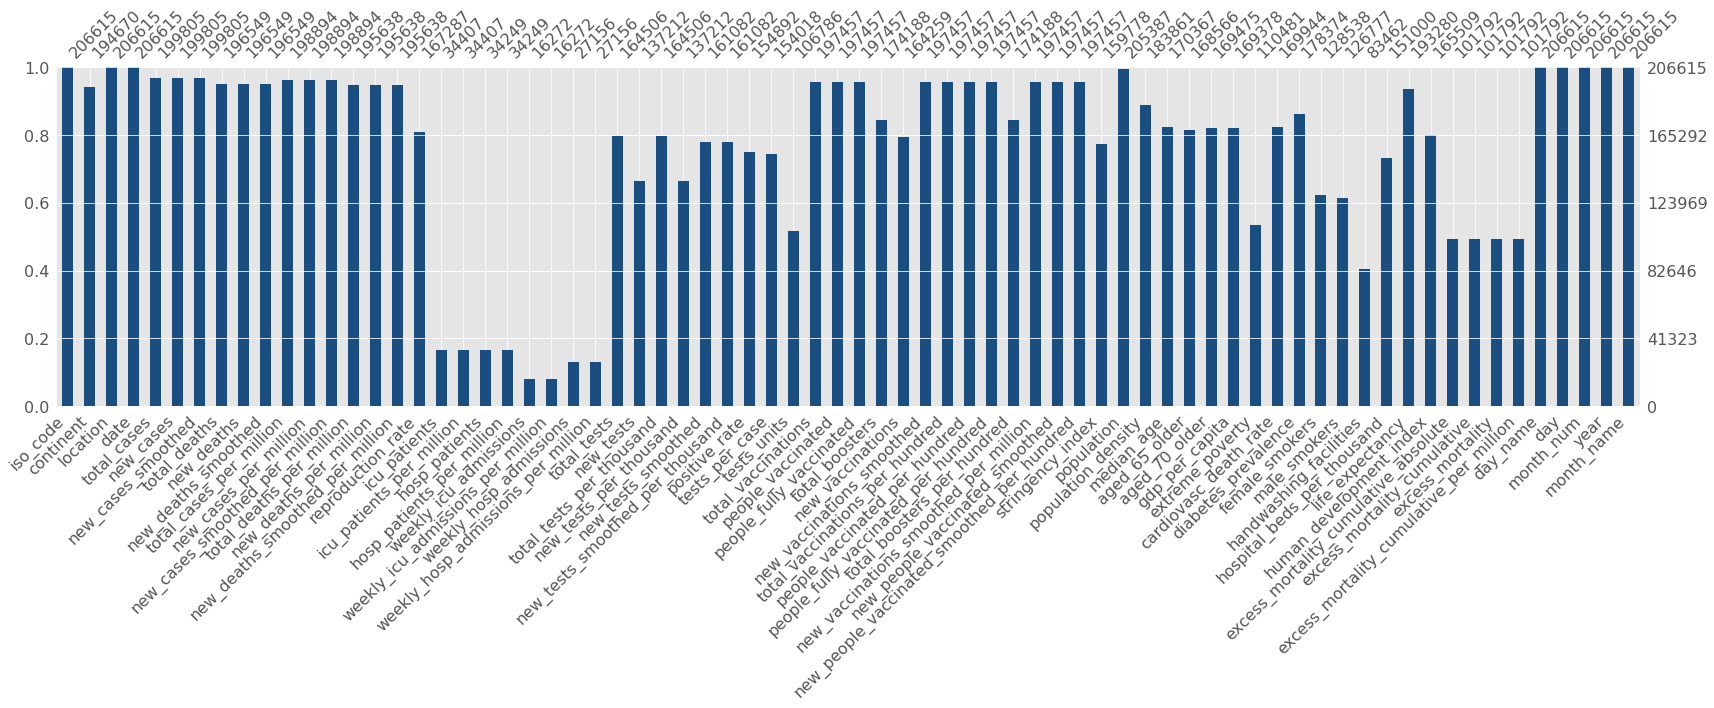

In [43]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5))

<AxesSubplot:>

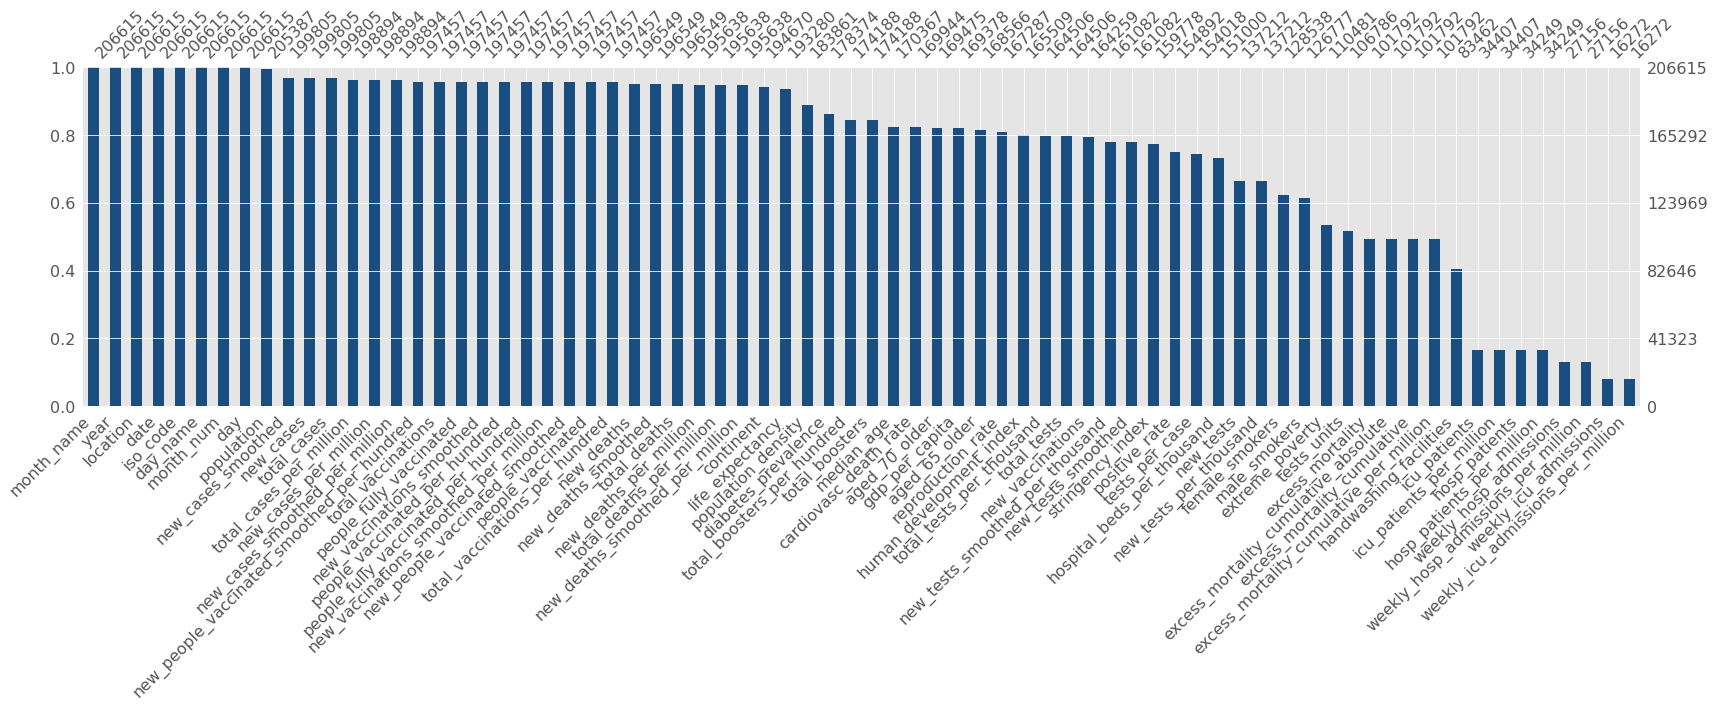

In [44]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5), sort='descending')

In [45]:
df_filled.drop(columns=['day', 'month_num', 'year']).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.99805e+05  1.99805e+05         1.99805e+05   1.96549e+05   
mean   3.78375e+06  1.24704e+04         1.24659e+04   6.40616e+04   
std    2.38252e+07  8.68728e+04         8.46730e+04   3.42783e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.23600e+03  0.00000e+00         6.71400e+00   8.30000e+01   
50%    4.05810e+04  6.40000e+01         9.94290e+01   8.22000e+02   
75%    4.39901e+05  1.01100e+03         1.15314e+03   8.10300e+03   
max    5.82928e+08  4.07947e+06         3.43795e+06   6.41565e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  196549.00000         196549.00000             198894.00000   
mean      136.72670            137.24959              49741.69959   
std       729.01135            712.36088              90907.22278   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                889.65800   
50%         1.00000              1.42900               8053.86650   
75%        14.00000             15.14300              61066.04875   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           198894.00000                    198894.00000   
mean               188.41709                       188.39952   
std                913.67631                       595.56773   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48100   
50%                  9.22050                        20.17150   
75%                103.08575                       137.44750   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              195638.00000            195638.00000   
mean                  618.15584                 1.51152   
std                   899.21453                 5.05892   
min                     0.00000                 0.00000   
25%                    28.05575                 0.00000   
50%                   183.07300                 0.11200   
75%                   923.82900                 1.26700   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     195638.00000       167287.00000   34407.00000   
mean                           1.50347            0.96302     823.71428   
std                            3.32744            0.37029    2403.21416   
min                            0.00000           -0.05000       0.00000   
25%                            0.01200            0.77000      31.00000   
50%                            0.27100            0.98000     148.00000   
75%                            1.63800            1.15000     630.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               34407.00000    34249.00000                34249.00000   
mean                   21.18124     4374.35915                  157.72721   
std                    24.92141    10813.91336                  185.08204   
min                     0.00000        0.00000                    0.00000   
25%                     4.99366      187.00000                   37.58000   
50%                    11.98800      861.26897                   90.54600   
75%                    30.68250     3781.00000                  211.66700   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            16272.00000                        16272.00000   
mean               288.07076                           12.60210   
std                469.14053                           12.15741   
min             

# Compute Pairwise Correlation

In [46]:
# compute the correlation matrix
cor_mat = df_filled.drop(columns=['day', 'month_num', 'year']).describe().corr()
cor_mat

total_cases  new_cases  \
total_cases                                     1.00000    0.99845   
new_cases                                       0.99845    1.00000   
new_cases_smoothed                              0.99802    0.99996   
total_deaths                                    0.99955    0.99921   
new_deaths                                     -0.05891   -0.00653   
new_deaths_smoothed                            -0.07614   -0.02381   
total_cases_per_million                         0.95656    0.96766   
new_cases_per_million                           0.63975    0.67949   
new_cases_smoothed_per_million                  0.02652    0.07892   
total_deaths_per_million                       -0.12036   -0.06821   
new_deaths_per_million                         -0.14756   -0.09553   
new_deaths_smoothed_per_million                -0.14958   -0.09757   
reproduction_rate                              -0.15029   -0.09828   
icu_patients                                    0.56839    0.61011   
icu_patients_per_million                       -0.14562   -0.09358   
hosp_patients                                   0.97691    0.98605   
hosp_patients_per_million                      -0.10883   -0.05662   
weekly_icu_admissions                           0.13831    0.18977   
weekly_icu_admissions_per_million              -0.13740   -0.08531   
weekly_hosp_admissions                          0.98566    0.99241   
weekly_hosp_admissions_per_million             -0.12914   -0.07699   
total_tests                                     0.99990    0.99875   
new_tests                                       0.99936    0.99898   
total_tests_per_thousand                        0.04729    0.09946   
new_tests_per_thousand                         -0.14653   -0.09449   
new_tests_smoothed                              0.99949    0.99759   
new_tests_smoothed_per_thousand                -0.14944   -0.09742   
positive_rate                                  -0.15032   -0.09830   
tests_per_case                                  0.98809    0.99481   
total_vaccinations                              0.99990    0.99791   
people_vaccinated                               0.99979    0.99763   
people_fully_vaccinated                         0.99987    0.99782   
total_boosters                                  0.99999    0.99830   
new_vaccinations                                0.99997    0.99830   
new_vaccinations_smoothed                       0.99995    0.99833   
total_vaccinations_per_hundred                 -0.14878   -0.09676   
people_vaccinated_per_hundred                  -0.14983   -0.09781   
people_fully_vaccinated_per_hundred            -0.14982   -0.09780   
total_boosters_per_hundred                     -0.14964   -0.09763   
new_vaccinations_smoothed_per_million           0.40663    0.45410   
new_people_vaccinated_smoothed                  0.99996    0.99884   
new_people_vaccinated_smoothed_per_hundred     -0.15026   -0.09825   
stringency_index                               -0.14994   -0.09793   
population                                      0.99893    0.99597   
population_density                             -0.04099    0.01129   
median_age                                     -0.15019   -0.09818   
aged_65_older                                  -0.15020   -0.09819   
aged_70_older                                  -0.15024   -0.09823   
gdp_per_capita                                  0.45448    0.49935   
extreme_poverty                                -0.14972   -0.09770   
cardiovasc_death_rate                          -0.14732   -0.09528   
diabetes_prevalence                            -0.15019   -0.09818   
female_smokers                                 -0.15005   -0.09804   
male_smokers                                   -0.14991   -0.09790   
handwashing_facilities                         -0.14962   -0.09760   
hospital_beds_per_thousand                     -0.15025   -0.09824   
life_expectancy                                -0.1502

In [47]:
cor_mat['total_deaths'].sort_values(ascending=False)

total_deaths                                  1.00000
new_people_vaccinated_smoothed                0.99976
new_vaccinations_smoothed                     0.99967
new_vaccinations                              0.99963
total_cases                                   0.99955
total_boosters                                0.99954
new_tests_smoothed                            0.99954
total_vaccinations                            0.99952
people_fully_vaccinated                       0.99950
people_vaccinated                             0.99945
total_tests                                   0.99934
new_cases                                     0.99921
new_cases_smoothed                            0.99906
new_tests                                     0.99877
population                                    0.99873
excess_mortality_cumulative_absolute          0.99767
tests_per_case                                0.99173
weekly_hosp_admissions                        0.99004
hosp_patients               

# Check Duplication

In [48]:
df_filled.duplicated().sum()

0

In [49]:
df_filled.describe(exclude='number')

iso_code continent   location                 date      tests_units  \
count    206615    194670     206615               206615           106786   
unique      244         6        244                  948                4   
top         ARG    Africa  Argentina  2021-09-01 00:00:00  tests performed   
freq        948     47833        948                  243            80097   
first       NaN       NaN        NaN  2020-01-01 00:00:00              NaN   
last        NaN       NaN        NaN  2022-08-05 00:00:00              NaN   

       day_name month_name  
count    206615     206615  
unique        7         12  
top      Friday       July  
freq      29622      21601  
first       NaN        NaN  
last        NaN        NaN

# Exploratory Data Analysis

Create helper functions to visualize datasets

In [50]:
from matplotlib.ticker import FuncFormatter

# helper functions to format y-axis
def billion(x, pos):
    return '%1.1fB' % (x * 1e-9)

format_bill = FuncFormatter(billion)


def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
    return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)


# barplot helper function
def plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create a figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart 
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, ci=ci, color=color, 
        hue_order=hue_order, order=order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_bar


# line chart helper function
def plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create a figure and axis 
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, size=size, markers=markers, style=style, ci=ci,
        hue_order=hue_order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line


# helper function to get specific date range
def get_data(data, before=None, after=None, rule=None):
    return data.set_index('date').sort_index(ascending=True, axis='index').truncate(before, after).resample(rule)

# helper function to plot line chart
def plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.autofmt_xdate()

    # plot line
    sns.lineplot(
        data=data,
        x=x, y=y,
        ci=None, 
        hue=hue, hue_order=hue_order, palette=palette,
        ax=ax
    )

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_date_rng

# Cases Exploration

In [51]:
cases_cols = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million',
              'new_cases_per_million', 'new_cases_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_cases = df_filled[cases_cols] 
df_cases.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_cases_per_million  new_cases_per_million  \
0           209.90045                    0.125                  0.125   
1           209.90045                    0.125                  0.000   
2           209.90045                    0.125                  0.000   
3           209.90045                    0.125                  0.000   
4           209.90045                    0.125                  0.000   

   new_cases_smoothed_per_million  year  month_num month_name  day   day_name  
0                          5.2345  2020          2        Feb   24     Monday  
1                          5.2345  2020          2        Feb   25    Tuesday  
2                          5.2345  2020          2        Feb   26  Wednesday  
3                          5.2345  2020          2        Feb   27   Thursday  
4                          5.2345  2020          2        Feb   28     Friday

In [52]:
df_cases.drop(columns=['year', 'month_num', 'day', 'day_name']).describe()

total_cases    new_cases  new_cases_smoothed  total_cases_per_million  \
count  1.99805e+05  1.99805e+05         1.99805e+05             198894.00000   
mean   3.78375e+06  1.24704e+04         1.24659e+04              49741.69959   
std    2.38252e+07  8.68728e+04         8.46730e+04              90907.22278   
min    1.00000e+00  0.00000e+00         0.00000e+00                  0.00100   
25%    3.23600e+03  0.00000e+00         6.71400e+00                889.65800   
50%    4.05810e+04  6.40000e+01         9.94290e+01               8053.86650   
75%    4.39901e+05  1.01100e+03         1.15314e+03              61066.04875   
max    5.82928e+08  4.07947e+06         3.43795e+06             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  
count           198894.00000                    198894.00000  
mean               188.41709                       188.39952  
std                913.67631                       595.56773  
min                  0.00000                         0.00000  
25%                  0.00000                         1.48100  
50%                  9.22050                        20.17150  
75%                103.08575                       137.44750  
max             195005.31300                     35258.84300

In [53]:
df_cases.isna().sum()                                   # check missing values

iso_code                              0
continent                         11945
location                              0
date                                  0
total_cases                        6810
new_cases                          6810
new_cases_smoothed                 6810
total_cases_per_million            7721
new_cases_per_million              7721
new_cases_smoothed_per_million     7721
year                                  0
month_num                             0
month_name                            0
day                                   0
day_name                              0
dtype: int64

<AxesSubplot:>

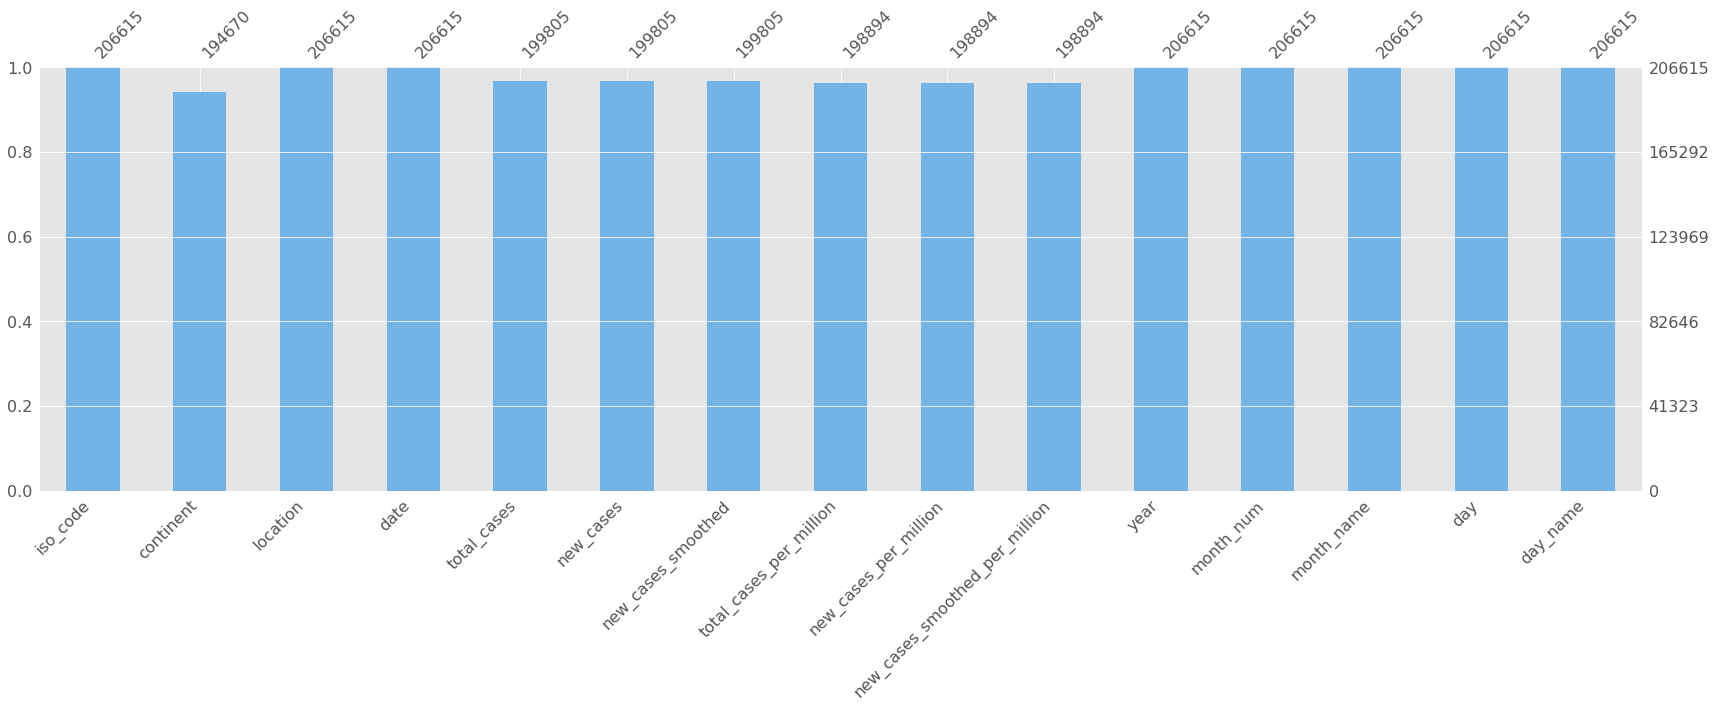

In [54]:
msno.bar(df_cases, labels=True, color=(0.45, 0.70, 0.90))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

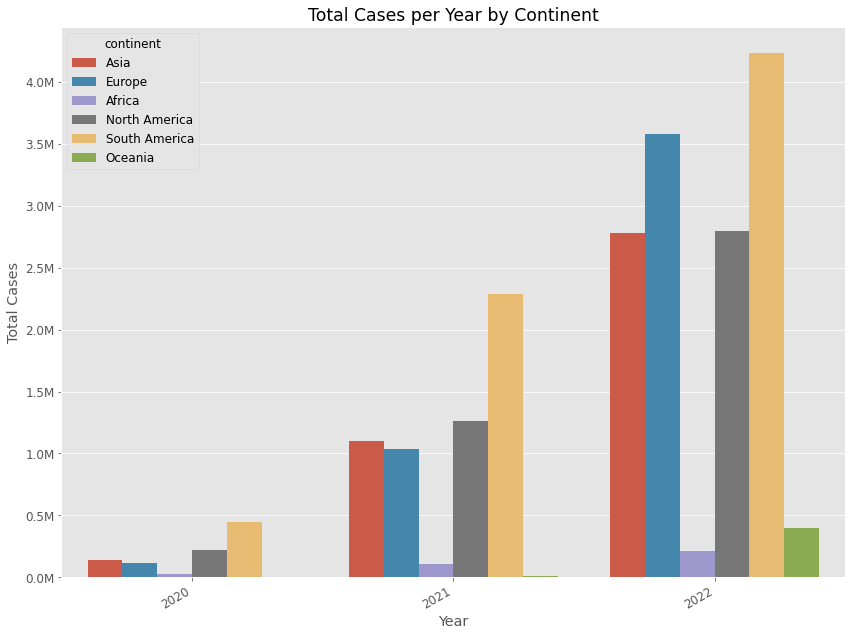

In [55]:
plot_bar(
    data=df_cases,
    x='year', y='total_cases', hue='continent', 
    title='Total Cases per Year by Continent', xlabel='Year', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

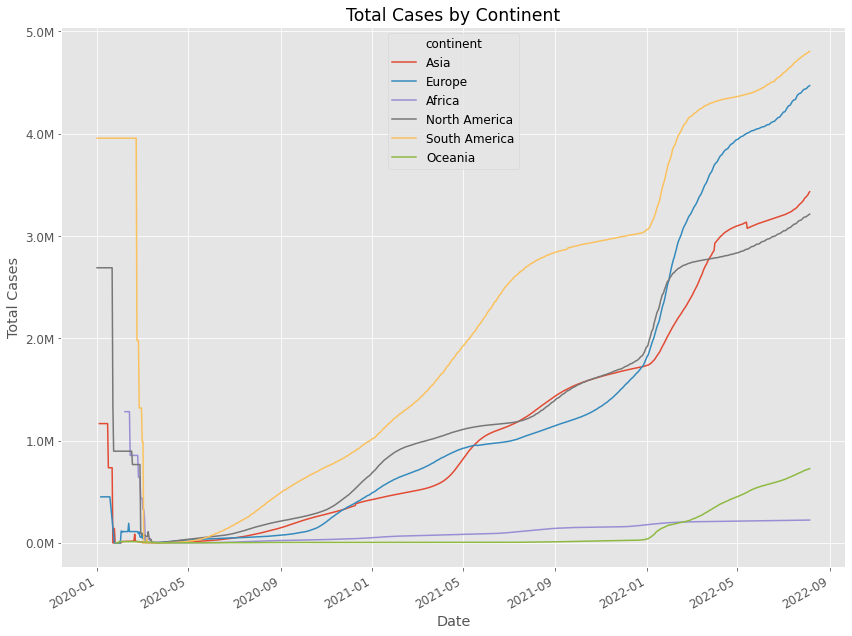

In [56]:
plot_line(
    data=df_cases,
    x='date', y='total_cases', hue='continent', 
    title='Total Cases by Continent', xlabel='Date', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

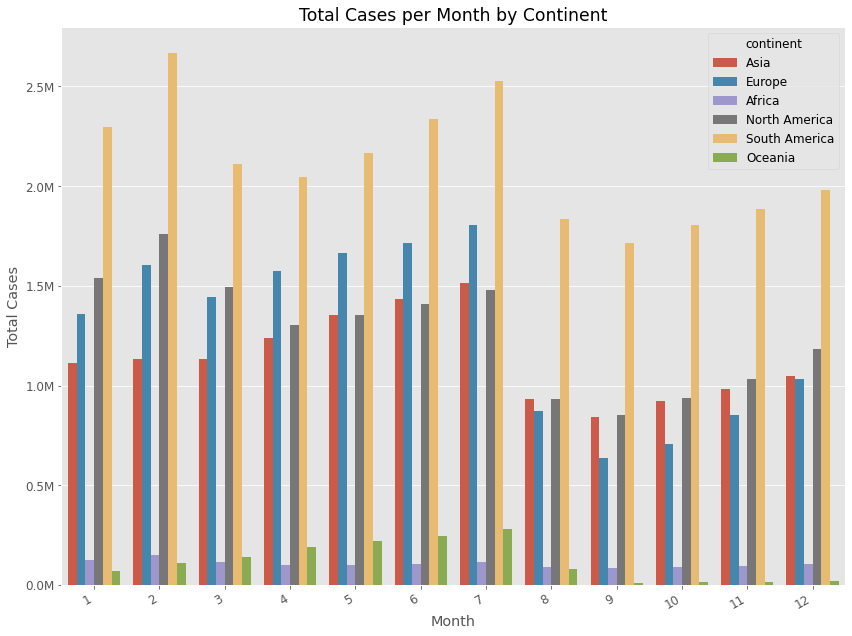

In [57]:
plot_bar(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

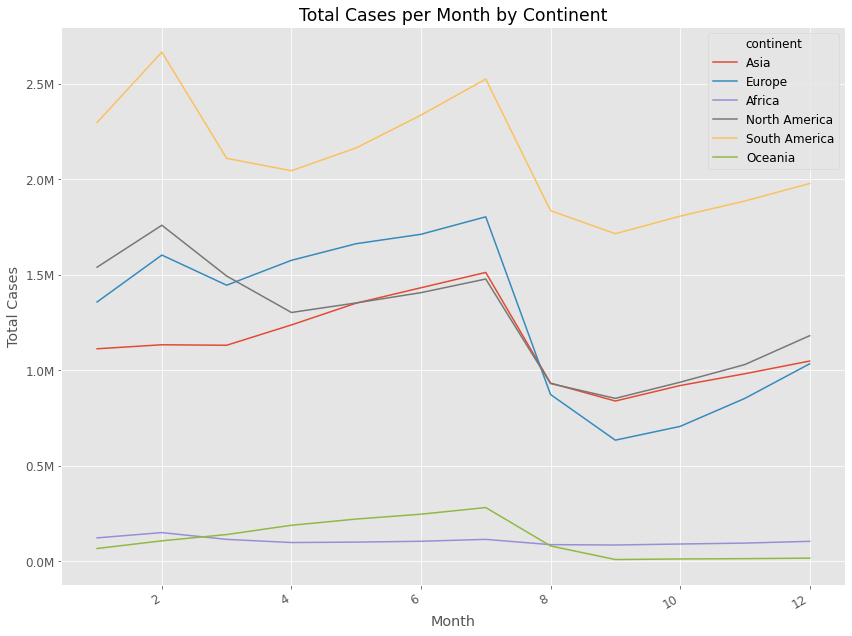

In [58]:
plot_line(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases',
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

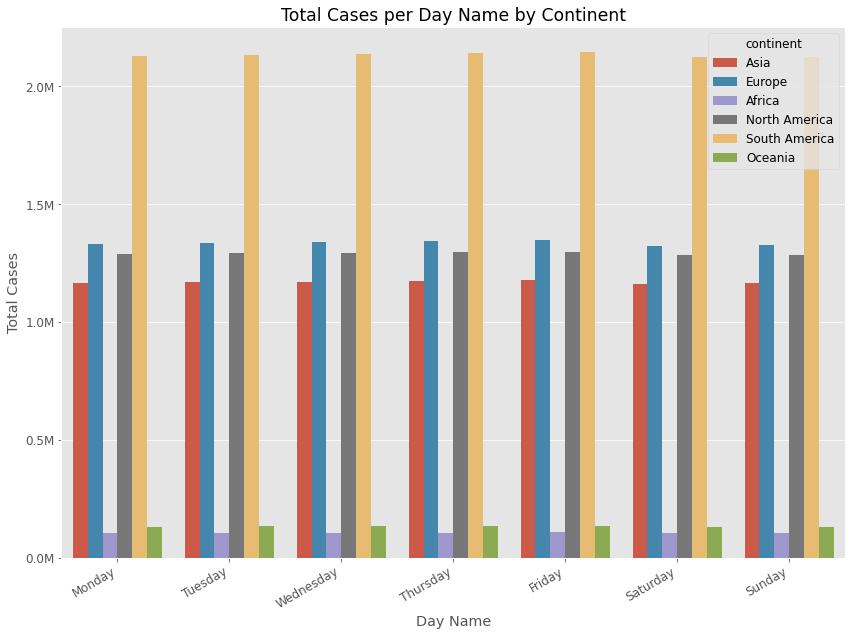

In [59]:
plot_bar(
    data=df_cases,
    x='day_name', y='total_cases', hue='continent', 
    title='Total Cases per Day Name by Continent', xlabel='Day Name', ylabel='Total Cases', 
    formatter=format_mill
)

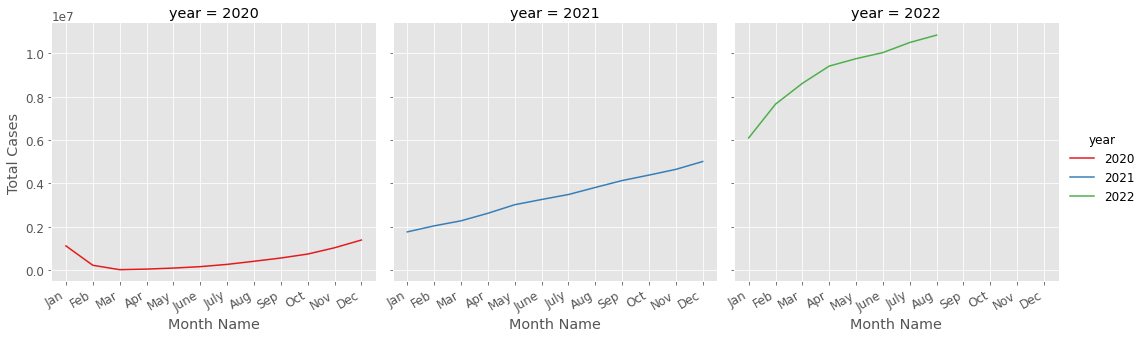

In [60]:
g = sns.relplot(
  data=df_cases,
  x='month_name', y='total_cases', ci=None,
  col='year', hue='year', palette='Set1',
  kind='line'
)

g.set(xlabel='Month Name', ylabel='Total Cases')
g.fig.autofmt_xdate()

# Deaths Exploration

In [61]:
deaths_cols = ['iso_code', 'continent', 'location', 'date', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 
               'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_deaths = df_filled[deaths_cols]
df_deaths.head()

iso_code continent     location       date  total_deaths  new_deaths  \
0      AFG      Asia  Afghanistan 2020-02-24     4307.0739      8.9515   
1      AFG      Asia  Afghanistan 2020-02-25     4307.0739      8.9515   
2      AFG      Asia  Afghanistan 2020-02-26     4307.0739      8.9515   
3      AFG      Asia  Afghanistan 2020-02-27     4307.0739      8.9515   
4      AFG      Asia  Afghanistan 2020-02-28     4307.0739      8.9515   

   new_deaths_smoothed  total_deaths_per_million  new_deaths_per_million  \
0              9.00016                 107.40978                  0.2233   
1              9.00016                 107.40978                  0.2233   
2              9.00016                 107.40978                  0.2233   
3              9.00016                 107.40978                  0.2233   
4              9.00016                 107.40978                  0.2233   

   new_deaths_smoothed_per_million  year  month_num month_name  day   day_name  
0                          0.22449  2020          2        Feb   24     Monday  
1                          0.22449  2020          2        Feb   25    Tuesday  
2                          0.22449  2020          2        Feb   26  Wednesday  
3                          0.22449  2020          2        Feb   27   Thursday  
4                          0.22449  2020          2        Feb   28     Friday

In [62]:
df_deaths[['total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']].describe()

total_deaths    new_deaths  new_deaths_smoothed  \
count   1.96549e+05  196549.00000         196549.00000   
mean    6.40616e+04     136.72670            137.24959   
std     3.42783e+05     729.01135            712.36088   
min     1.00000e+00       0.00000              0.00000   
25%     8.30000e+01       0.00000              0.14300   
50%     8.22000e+02       1.00000              1.42900   
75%     8.10300e+03      14.00000             15.14300   
max     6.41565e+06   18191.00000          14817.14300   

       total_deaths_per_million  new_deaths_per_million  \
count              195638.00000            195638.00000   
mean                  618.15584                 1.51152   
std                   899.21453                 5.05892   
min                     0.00000                 0.00000   
25%                    28.05575                 0.00000   
50%                   183.07300                 0.11200   
75%                   923.82900                 1.26700   
max                  6363.42900               553.80300   

       new_deaths_smoothed_per_million  
count                     195638.00000  
mean                           1.50347  
std                            3.32744  
min                            0.00000  
25%                            0.01200  
50%                            0.27100  
75%                            1.63800  
max                          148.67300

In [63]:
df_deaths.isna().sum()                                   # check missing values

iso_code                               0
continent                          11945
location                               0
date                                   0
total_deaths                       10066
new_deaths                         10066
new_deaths_smoothed                10066
total_deaths_per_million           10977
new_deaths_per_million             10977
new_deaths_smoothed_per_million    10977
year                                   0
month_num                              0
month_name                             0
day                                    0
day_name                               0
dtype: int64

<AxesSubplot:>

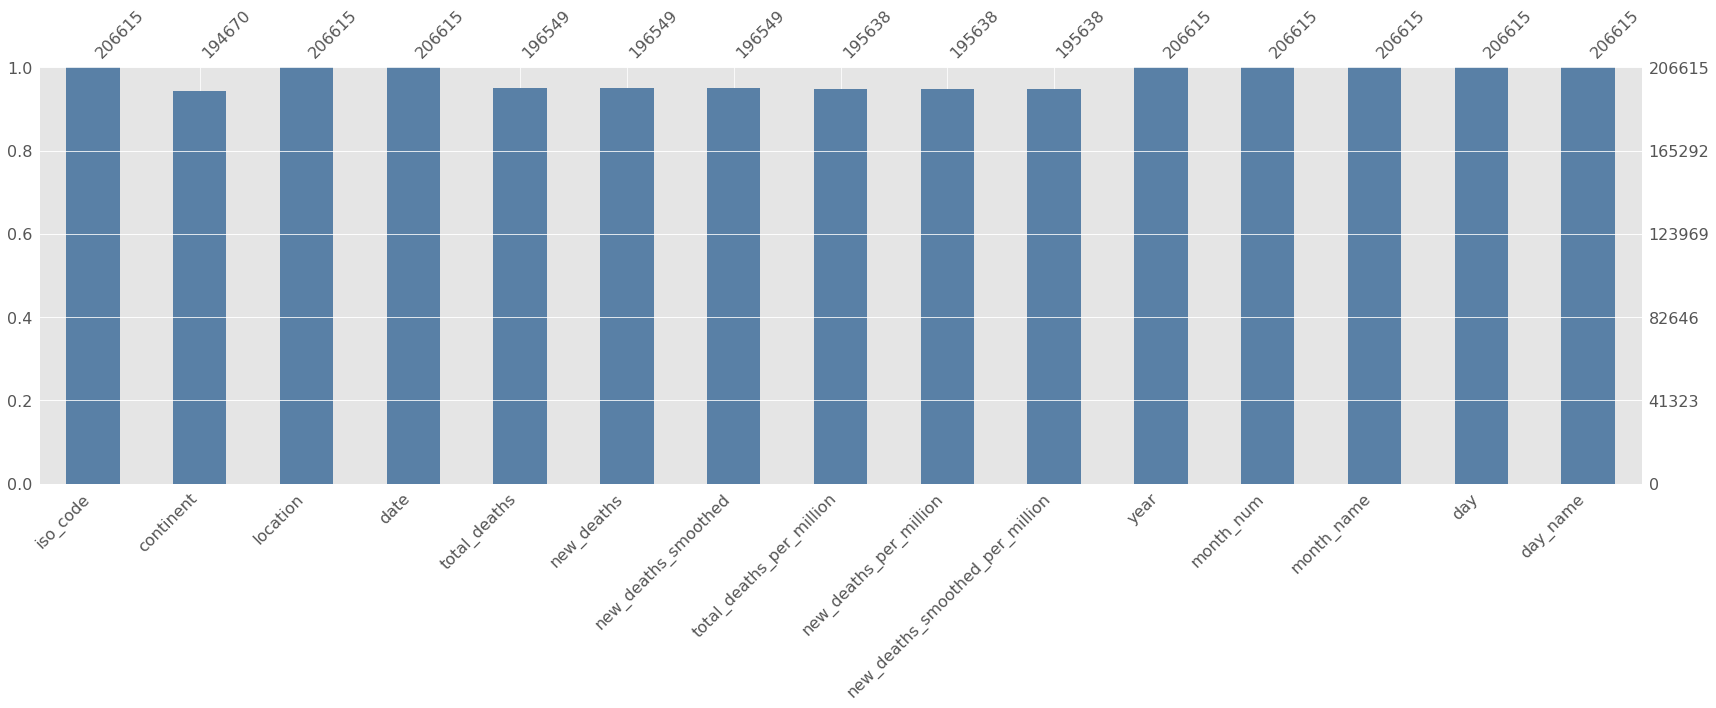

In [64]:
msno.bar(df_deaths, labels=True, color=(0.35, 0.50, 0.65))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

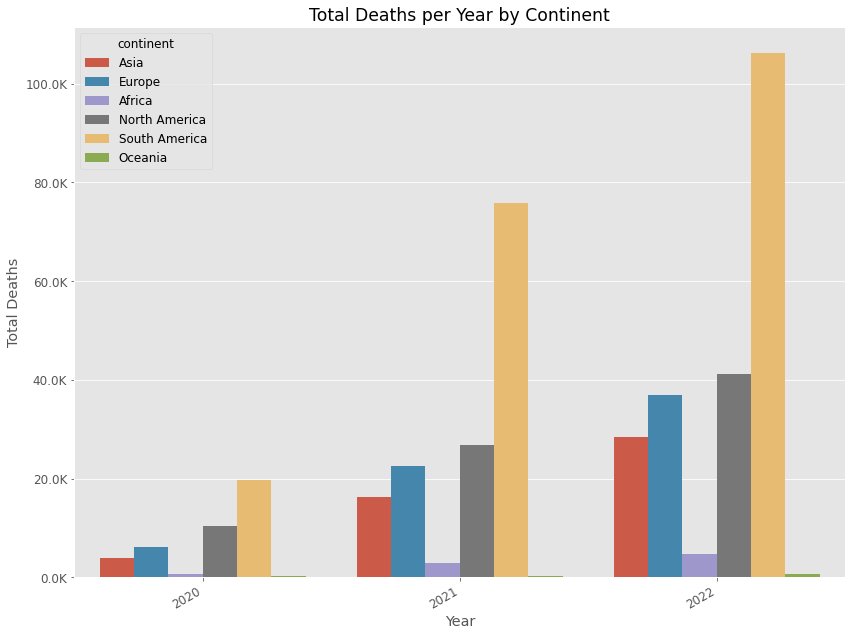

In [65]:
plot_bar(
    data=df_deaths,
    x='year', y='total_deaths', hue='continent', 
    title='Total Deaths per Year by Continent', xlabel='Year', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

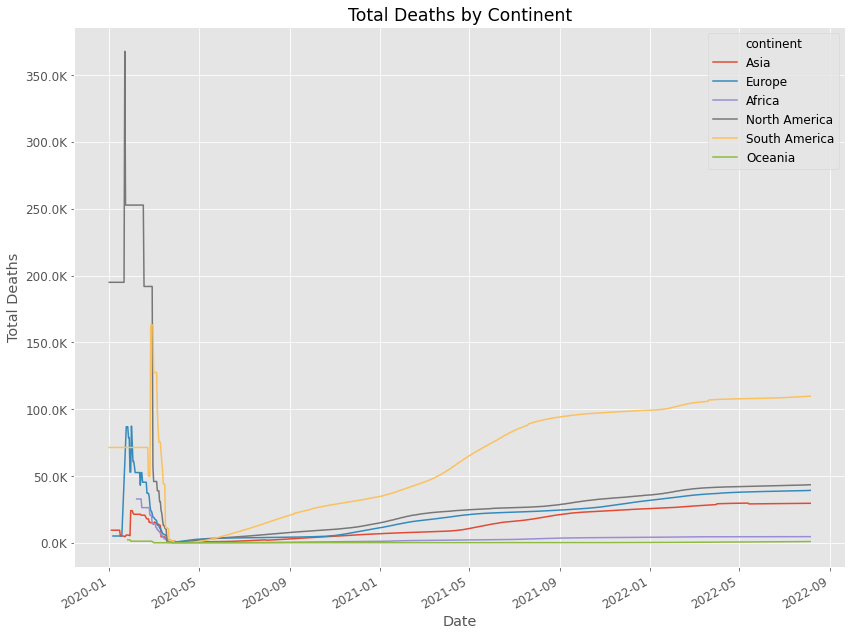

In [66]:
plot_line(
    data=df_deaths,
    x='date', y='total_deaths', hue='continent', 
    title='Total Deaths by Continent', xlabel='Date', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

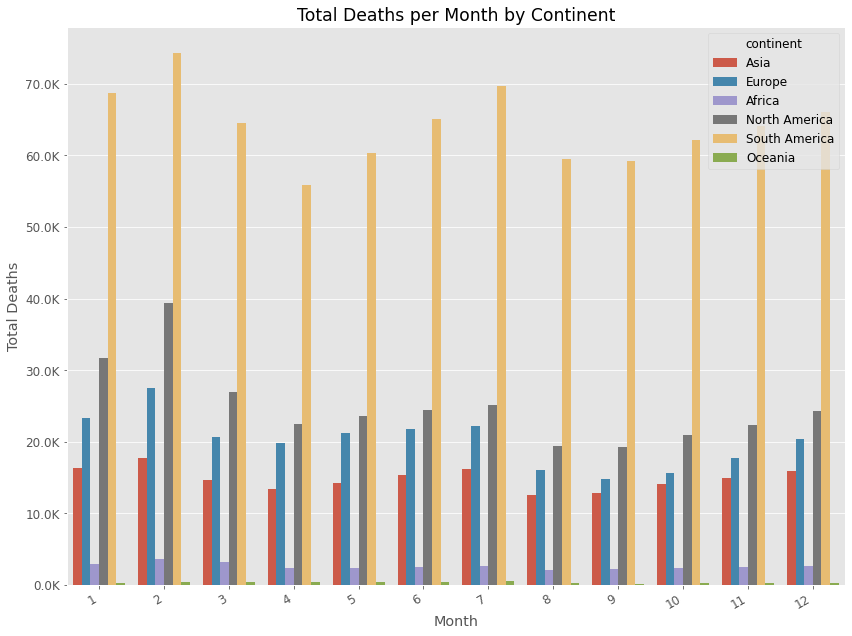

In [67]:
plot_bar(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

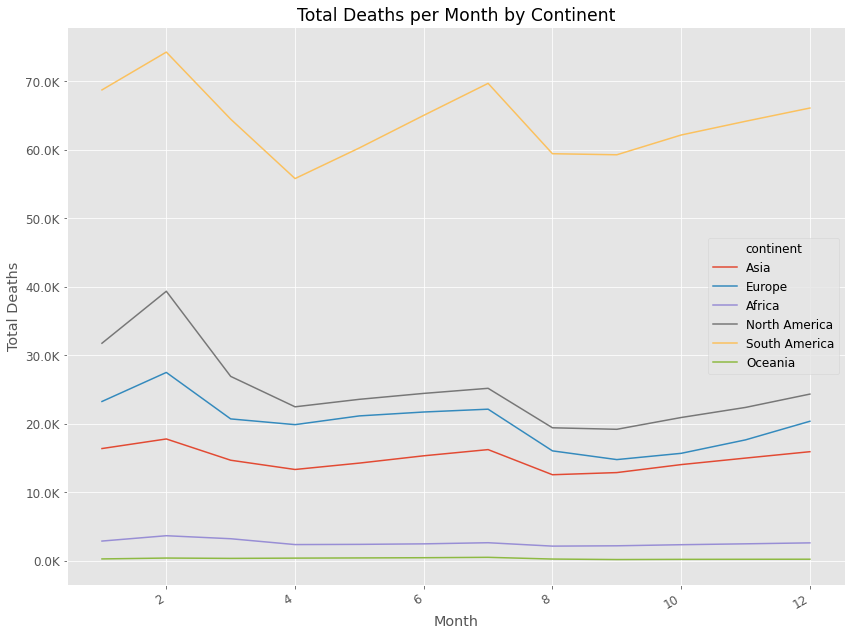

In [68]:
plot_line(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

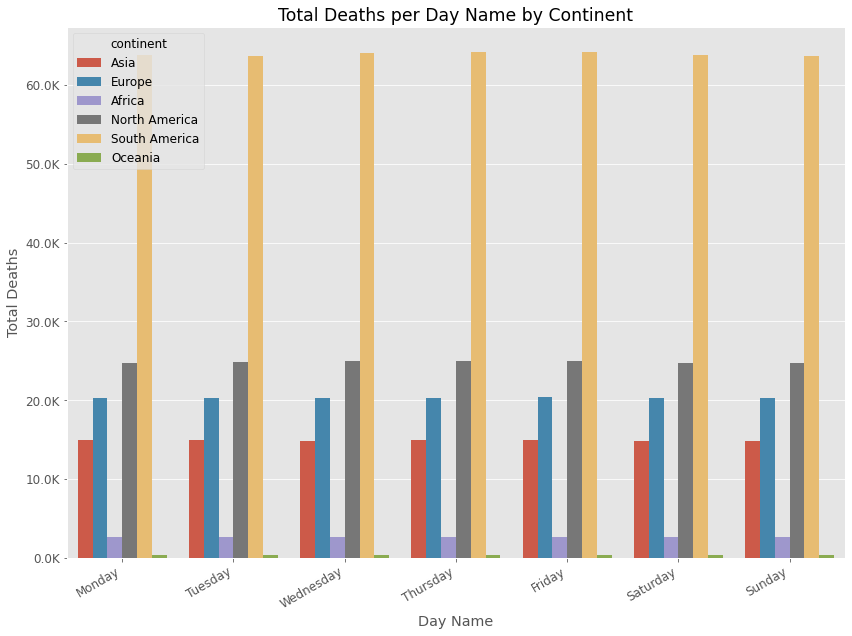

In [69]:
plot_bar(
    data=df_deaths,
    x='day_name', y='total_deaths', hue='continent', 
    title='Total Deaths per Day Name by Continent', xlabel='Day Name', ylabel='Total Deaths', 
    formatter=format_tsd
)

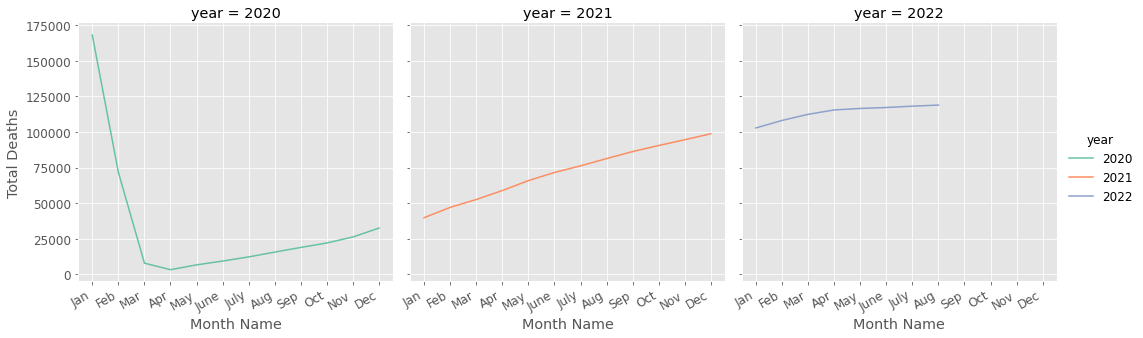

In [70]:
g1 = sns.relplot(
  data=df_deaths,
  x='month_name', y='total_deaths', ci=None, 
  col='year', hue='year', palette='Set2',
  kind='line'
)

g1.set(xlabel='Month Name', ylabel='Total Deaths')
g1.fig.autofmt_xdate()

# Tests Exploration

In [71]:
test_cols = ['iso_code', 'continent', 'location', 'date', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 
             'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'year', 'month_num', 
             'month_name', 'day', 'day_name']

df_test = df_filled[test_cols]
df_test.head()

iso_code continent     location       date  new_tests  total_tests  \
0      AFG      Asia  Afghanistan 2020-02-24        NaN     924645.2   
1      AFG      Asia  Afghanistan 2020-02-25        NaN     924645.2   
2      AFG      Asia  Afghanistan 2020-02-26        NaN     924645.2   
3      AFG      Asia  Afghanistan 2020-02-27        NaN     924645.2   
4      AFG      Asia  Afghanistan 2020-02-28        NaN     924645.2   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.2118                     NaN           983.55396   
1                   23.2118                     NaN           983.55396   
2                   23.2118                     NaN           983.55396   
3                   23.2118                     NaN           983.55396   
4                   23.2118                     NaN           983.55396   

   new_tests_smoothed_per_thousand  positive_rate  tests_per_case tests_units  \
0                          0.02486        0.12974        19.62899         NaN   
1                          0.02486        0.12974        19.62899         NaN   
2                          0.02486        0.12974        19.62899         NaN   
3                          0.02486        0.12974        19.62899         NaN   
4                          0.02486        0.12974        19.62899         NaN   

   year  month_num month_name  day   day_name  
0  2020          2        Feb   24     Monday  
1  2020          2        Feb   25    Tuesday  
2  2020          2        Feb   26  Wednesday  
3  2020          2        Feb   27   Thursday  
4  2020          2        Feb   28     Friday

In [72]:
df_test[['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
         'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units']].describe()

new_tests  total_tests  total_tests_per_thousand  \
count  1.37212e+05  1.64506e+05              164506.00000   
mean   4.74755e+04  3.07153e+07                 848.83584   
std    1.93349e+05  2.42652e+08                2195.71696   
min    1.00000e+00  0.00000e+00                   0.00000   
25%    9.74667e+02  1.94217e+05                  35.15500   
50%    4.74350e+03  9.24645e+05                 183.91500   
75%    2.27792e+04  5.32113e+06                 713.80730   
max    3.58556e+07  9.21400e+09               32925.90000   

       new_tests_per_thousand  new_tests_smoothed  \
count            137212.00000         1.61082e+05   
mean                  3.64028         1.22763e+05   
std                   9.28952         1.08246e+06   
min                   0.00000         0.00000e+00   
25%                   0.27300         6.39000e+02   
50%                   0.95900         3.45600e+03   
75%                   2.88200         2.17208e+04   
max                 534.01300         1.47700e+07   

       new_tests_smoothed_per_thousand  positive_rate  tests_per_case  
count                     161082.00000   154892.00000     1.54018e+05  
mean                           2.91912        0.09413     2.16823e+03  
std                            7.28311        0.10425     2.97213e+04  
min                            0.00000        0.00000     1.00000e+00  
25%                            0.15300        0.01878     9.90000e+00  
50%                            0.77800        0.06391     2.68624e+01  
75%                            2.63100        0.12974     7.99421e+01  
max                          147.60300        1.00000     1.02363e+06

In [73]:
df_test.isna().sum()                                   # check missing values

iso_code                               0
continent                          11945
location                               0
date                                   0
new_tests                          69403
total_tests                        42109
total_tests_per_thousand           42109
new_tests_per_thousand             69403
new_tests_smoothed                 45533
new_tests_smoothed_per_thousand    45533
positive_rate                      51723
tests_per_case                     52597
tests_units                        99829
year                                   0
month_num                              0
month_name                             0
day                                    0
day_name                               0
dtype: int64

<AxesSubplot:>

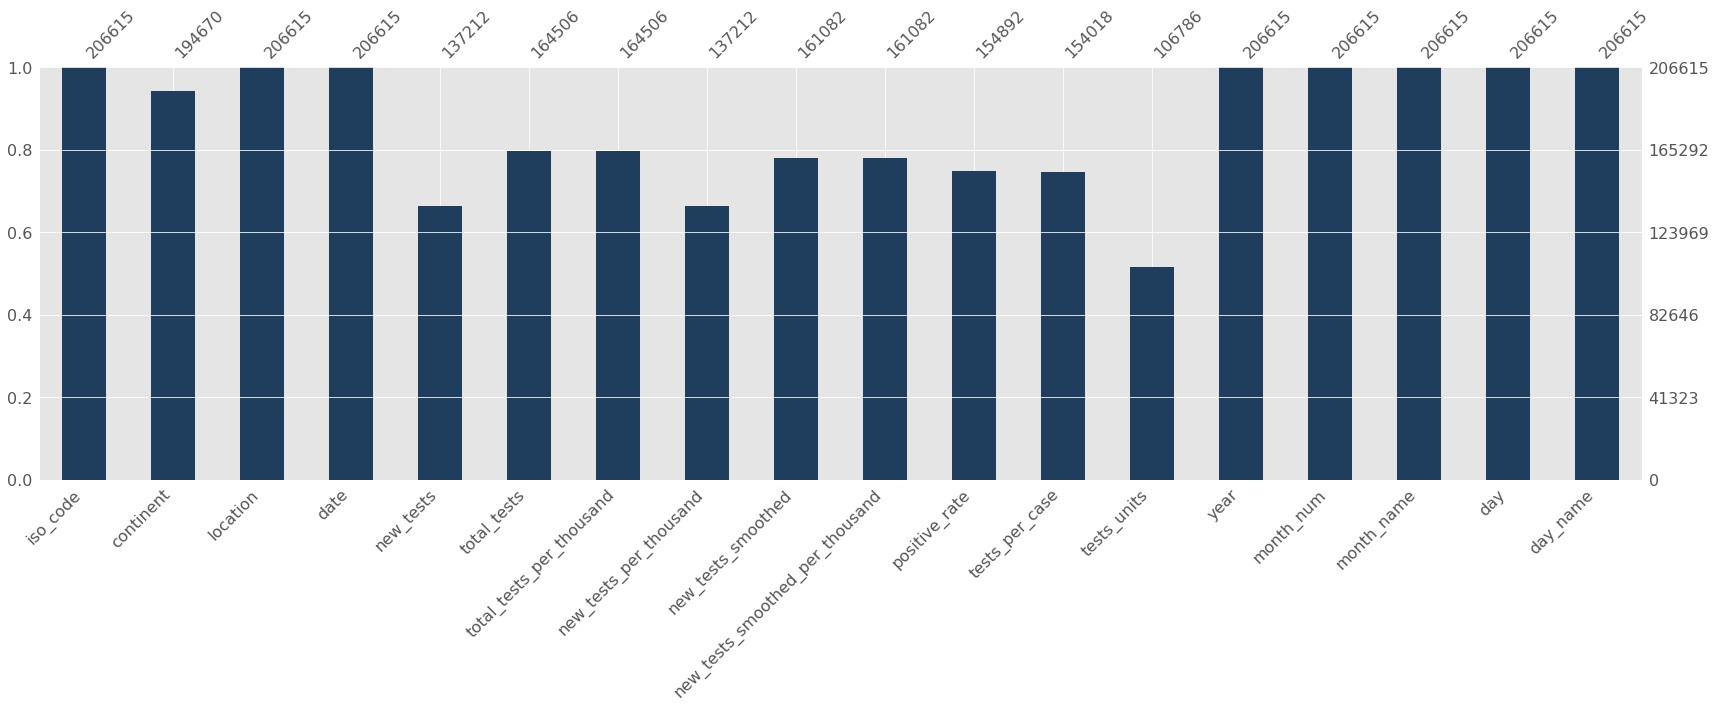

In [74]:
msno.bar(df_test, labels=True, color=(0.12, 0.24, 0.36))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

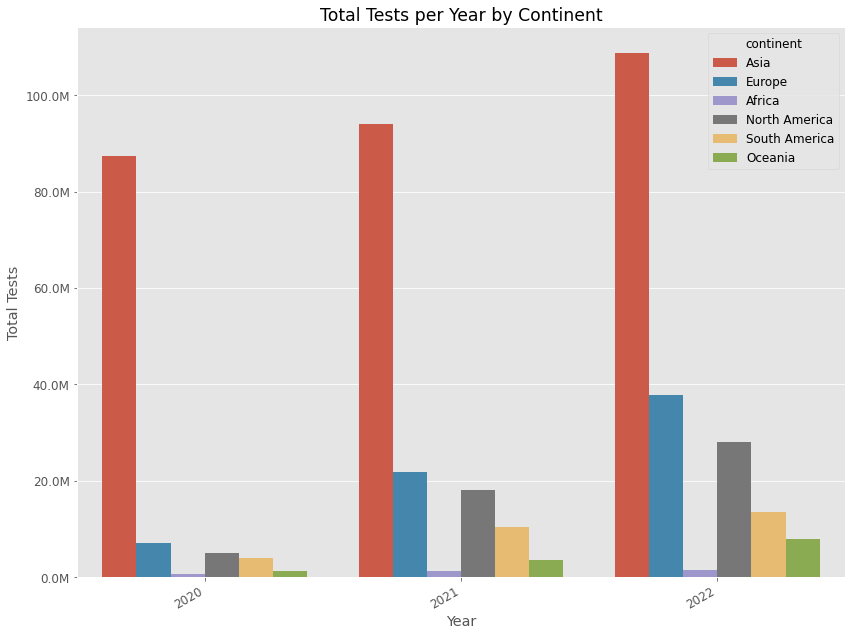

In [75]:
plot_bar(
    data=df_test,
    x='year', y='total_tests', hue='continent', 
    title='Total Tests per Year by Continent', xlabel='Year', ylabel='Total Tests', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

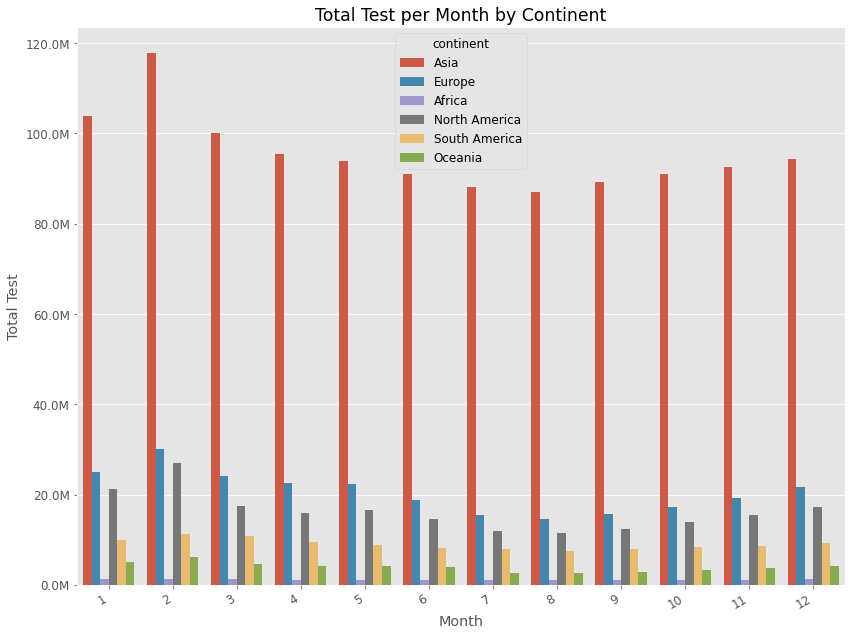

In [76]:
plot_bar(
    data=df_test,
    x='month_num', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

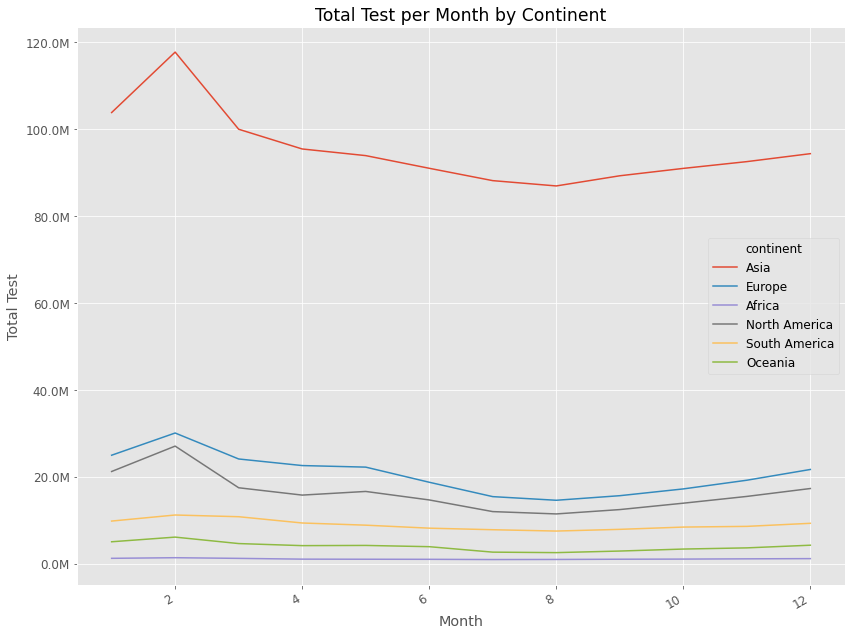

In [77]:
plot_line(
    data=df_test,
    x='month_num', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

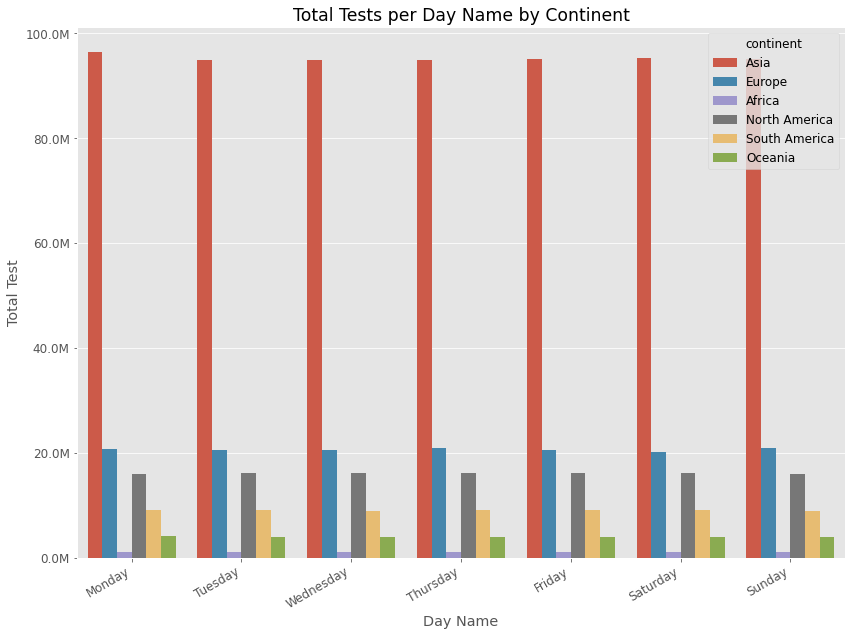

In [78]:
plot_bar(
    data=df_test,
    x='day_name', y='total_tests', hue='continent', 
    title='Total Tests per Day Name by Continent', xlabel='Day Name', ylabel='Total Test', 
    formatter=format_mill
)

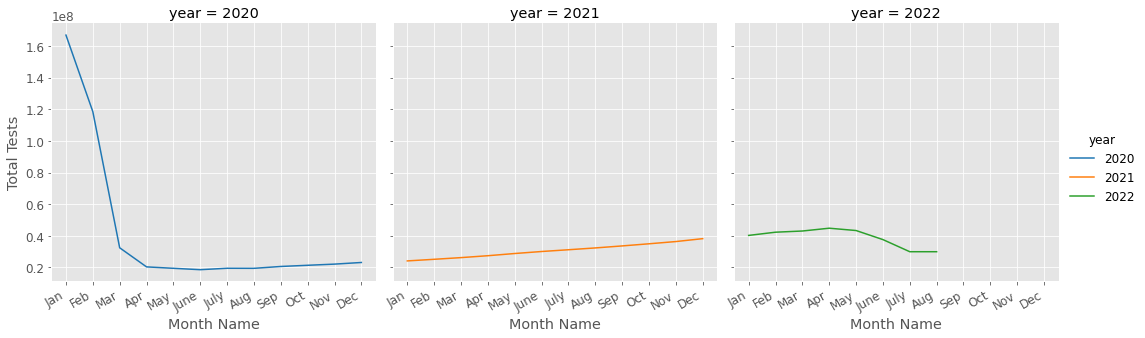

In [79]:
g2 = sns.relplot(
  data=df_test,
  x='month_name', y='total_tests', ci=None,
  col='year', hue='year', palette='tab10',
  kind='line'
)

g2.set(xlabel='Month Name', ylabel='Total Tests')
g2.fig.autofmt_xdate()

# Vaccinations Exploration

In [80]:
vacc_cols = ['iso_code', 'continent', 'location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
             'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
             'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
             'year', 'month_num', 'month_name', 'day', 'day_name']

df_vacc = df_filled[vacc_cols]
df_vacc.head()

iso_code continent     location       date  total_vaccinations  \
0      AFG      Asia  Afghanistan 2020-02-24         3.67439e+06   
1      AFG      Asia  Afghanistan 2020-02-25         3.67439e+06   
2      AFG      Asia  Afghanistan 2020-02-26         3.67439e+06   
3      AFG      Asia  Afghanistan 2020-02-27         3.67439e+06   
4      AFG      Asia  Afghanistan 2020-02-28         3.67439e+06   

   people_vaccinated  people_fully_vaccinated  total_boosters  \
0        3.27439e+06              3.09986e+06             NaN   
1        3.27439e+06              3.09986e+06             NaN   
2        3.27439e+06              3.09986e+06             NaN   
3        3.27439e+06              3.09986e+06             NaN   
4        3.27439e+06              3.09986e+06             NaN   

   new_vaccinations  new_vaccinations_smoothed  \
0           3531.25                   15358.35   
1           3531.25                   15358.35   
2           3531.25                   15358.35   
3           3531.25                   15358.35   
4           3531.25                   15358.35   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                         9.16323                        8.16557   
1                         9.16323                        8.16557   
2                         9.16323                        8.16557   
3                         9.16323                        8.16557   
4                         9.16323                        8.16557   

   people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
0                              7.73019                         NaN   
1                              7.73019                         NaN   
2                              7.73019                         NaN   
3                              7.73019                         NaN   
4                              7.73019                         NaN   

   new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
0                              383.06346                     13924.14808   
1                              383.06346                     13924.14808   
2                              383.06346                     13924.14808   
3                              383.06346                     13924.14808   
4                              383.06346                     13924.14808   

   new_people_vaccinated_smoothed_per_hundred  year  month_num month_name  \
0                                     0.03478  2020          2        Feb   
1                                     0.03478  2020          2        Feb   
2                                     0.03478  2020          2        Feb   
3                                     0.03478  2020          2        Feb   
4                                     0.03478  2020          2        Feb   

   day   day_name  
0   24     Monday  
1   25    Tuesday  
2   26  Wednesday  
3   27   Thursday  
4   28     Friday

In [81]:
df_vacc[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
         'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
         'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred']].describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count         1.97457e+05        1.97457e+05              1.97457e+05   
mean          1.21213e+08        6.00577e+07              5.04487e+07   
std           6.85124e+08        3.26535e+08              2.80211e+08   
min           0.00000e+00        0.00000e+00              1.00000e+00   
25%           3.36032e+05        2.12469e+05              1.68225e+05   
50%           2.32182e+06        1.28909e+06              1.22083e+06   
75%           1.36872e+07        7.09986e+06              6.40810e+06   
max           1.23944e+10        5.31078e+09              4.88006e+09   

       total_boosters  new_vaccinations  new_vaccinations_smoothed  \
count     1.74188e+05       1.64259e+05                1.97457e+05   
mean      1.87155e+07       4.94609e+05                4.00548e+05   
std       1.02878e+08       2.45790e+06                2.21389e+06   
min       1.00000e+00       0.00000e+00                0.00000e+00   
25%       3.92518e+04       3.08600e+03                1.11300e+03   
50%       4.79754e+05       1.59164e+04                8.20200e+03   
75%       4.02631e+06       9.25551e+04                5.84860e+04   
max       2.29312e+09       4.96671e+07                4.36879e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    197457.00000                   197457.00000   
mean                         74.30165                       37.26856   
std                          58.15251                       24.87126   
min                           0.00000                        0.00000   
25%                          21.92698                       14.58943   
50%                          67.99783                       37.44596   
75%                         111.66000                       55.84533   
max                         366.87000                      128.78000   

       people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
count                         197457.00000                174188.00000   
mean                              32.64794                    18.60465   
std                               23.16395                    18.97753   
min                                0.00000                     0.00000   
25%                               11.82885                     2.18500   
50%                               30.35143                    12.87500   
75%                               49.53484                    29.70124   
max                              126.79000                   134.07000   

       new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
count                           197457.00000                     1.97457e+05   
mean                              2779.05565                     1.55035e+05   
std                               3250.26362                     8.85213e+05   
min                                  0.00000                     0.00000e+00   
25%                                651.90792                     4.08000e+02   
50%                               2062.00000                     4.05286e+03   
75%                               3737.00000                     2.36875e+04   
max                             117862.00000                     2.10691e+07   

       new_people_vaccinated_smoothed_per_hundred  
count                                197457.00000  
mean                                      0.12131  
std                                       0.18935  
min                                       0.00000  
25%                                       0.02560  
50%                                       0.08400  
75%                                       0.14500  
max                                      11.78600

In [82]:
df_vacc.isna().sum()                                   # check missing values

iso_code                                          0
continent                                     11945
location                                          0
date                                              0
total_vaccinations                             9158
people_vaccinated                              9158
people_fully_vaccinated                        9158
total_boosters                                32427
new_vaccinations                              42356
new_vaccinations_smoothed                      9158
total_vaccinations_per_hundred                 9158
people_vaccinated_per_hundred                  9158
people_fully_vaccinated_per_hundred            9158
total_boosters_per_hundred                    32427
new_vaccinations_smoothed_per_million          9158
new_people_vaccinated_smoothed                 9158
new_people_vaccinated_smoothed_per_hundred     9158
year                                              0
month_num                                         0
month_name  

<AxesSubplot:>

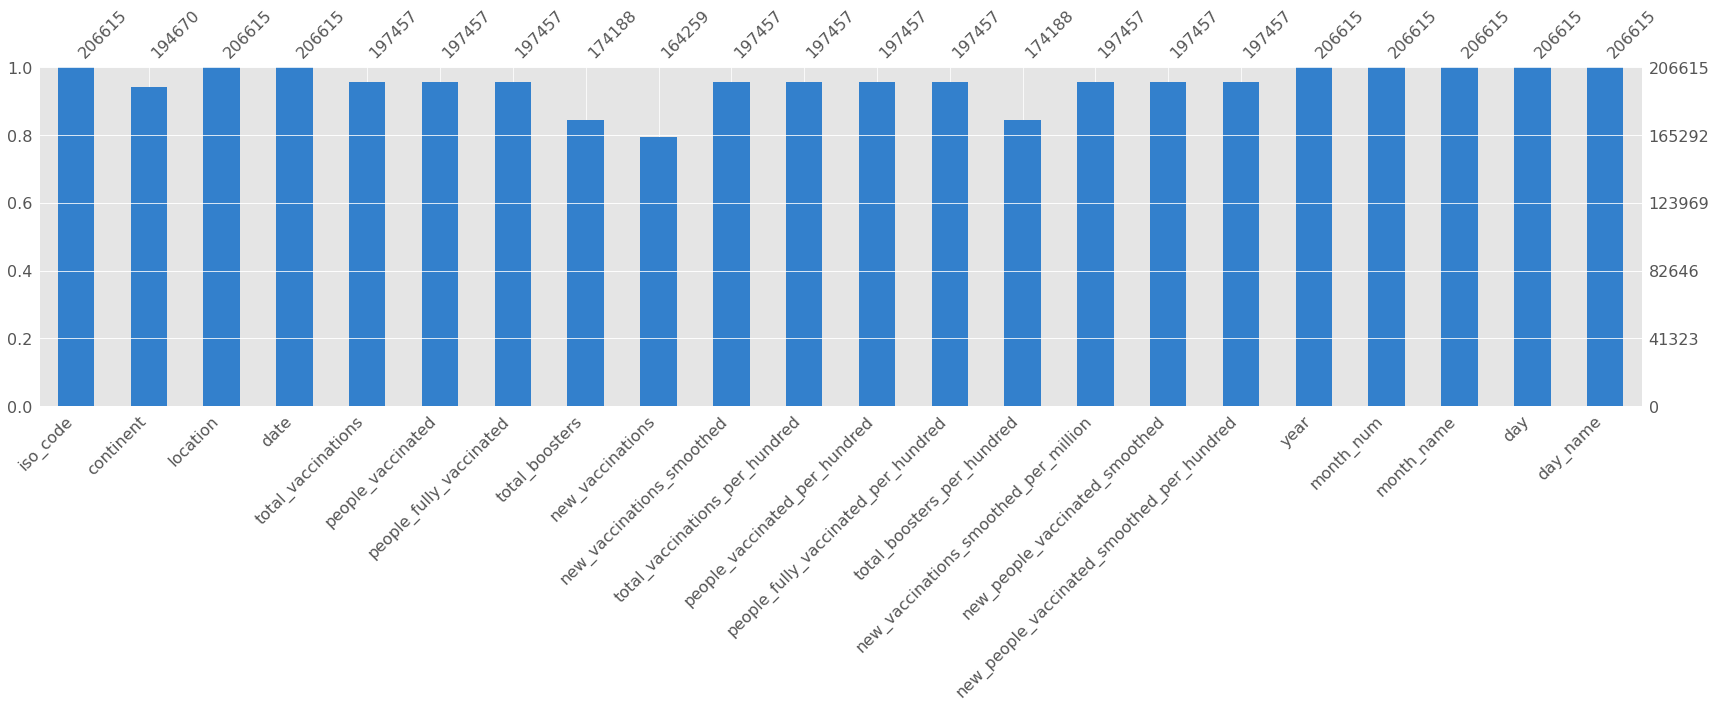

In [83]:
msno.bar(df_vacc, labels=True, color=(0.20, 0.50, 0.80))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

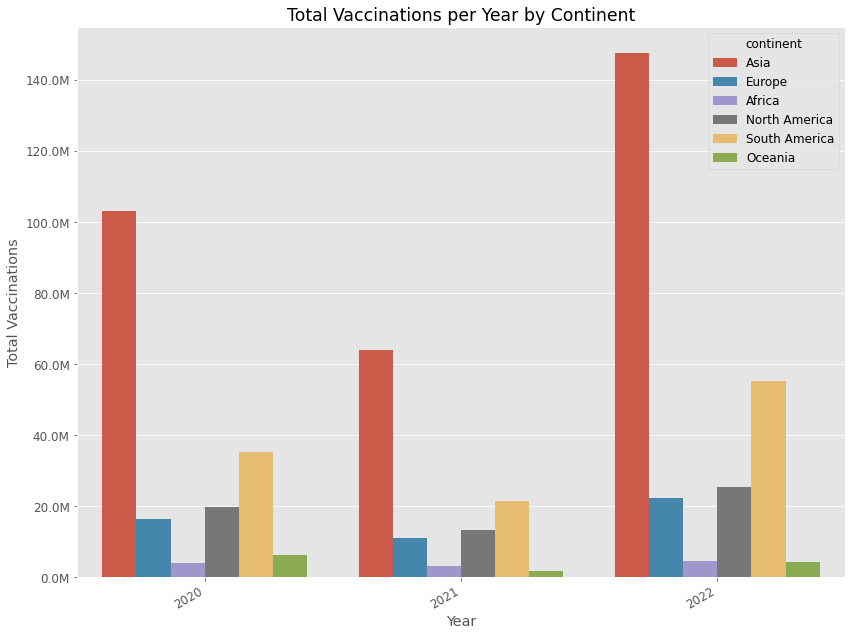

In [84]:
plot_bar(
    data=df_vacc,
    x='year', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Year by Continent', xlabel='Year', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

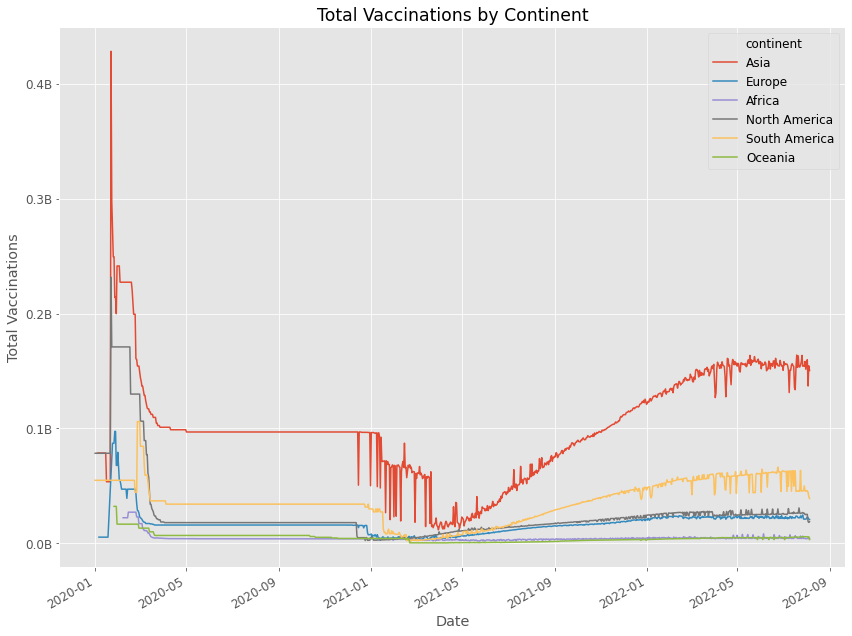

In [85]:
plot_line(
    data=df_vacc,
    x='date', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations by Continent', xlabel='Date', ylabel='Total Vaccinations', 
    formatter=format_bill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

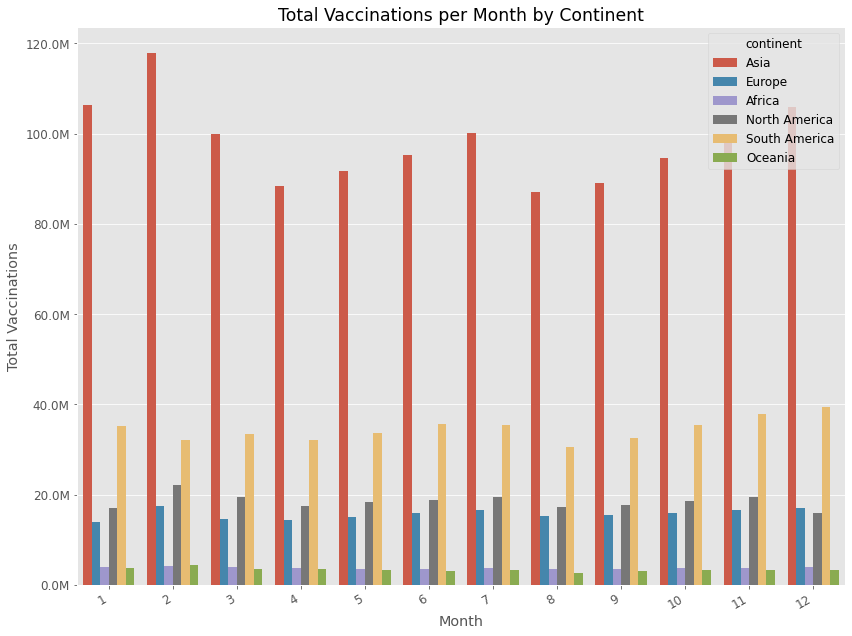

In [86]:
plot_bar(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

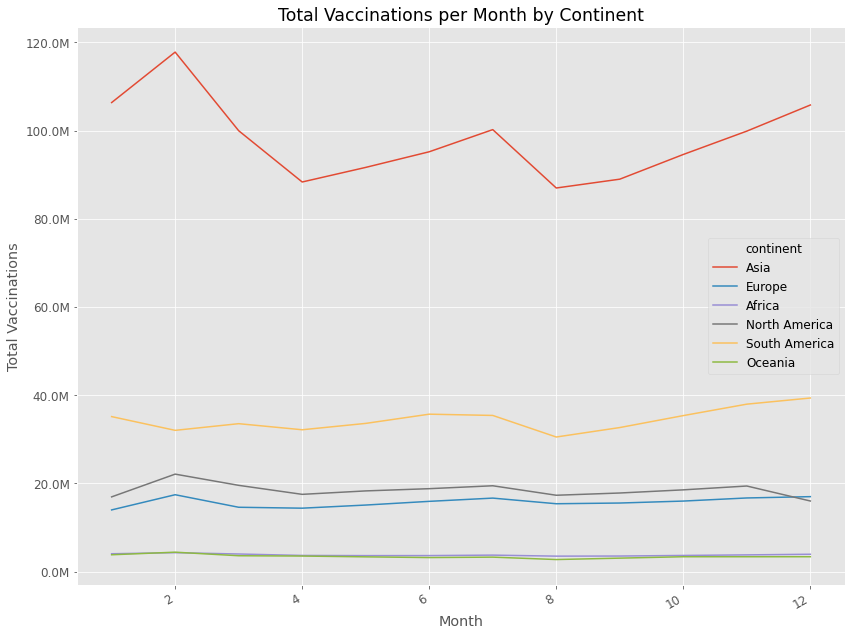

In [87]:
plot_line(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

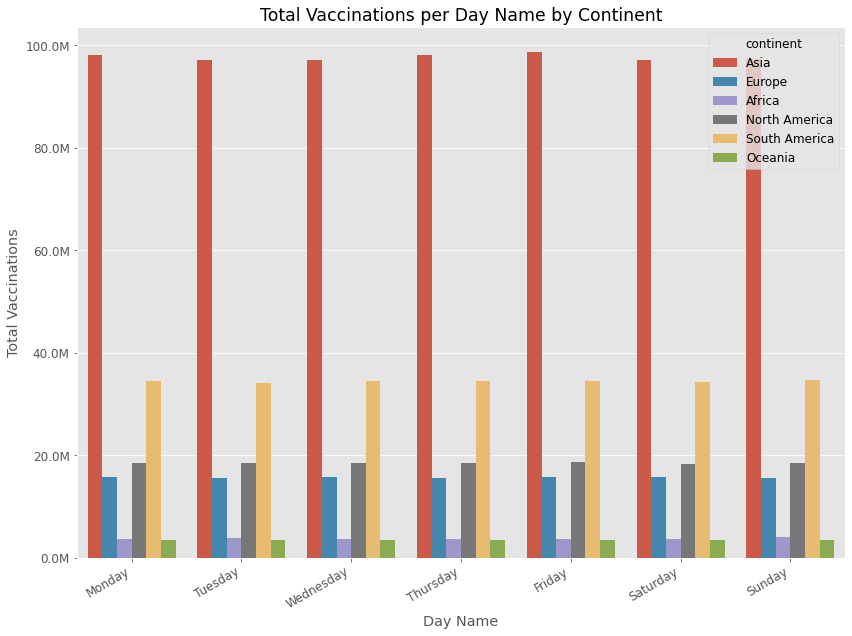

In [88]:
plot_bar(
    data=df_vacc,
    x='day_name', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Day Name by Continent', xlabel='Day Name', ylabel='Total Vaccinations', 
    formatter=format_mill
)

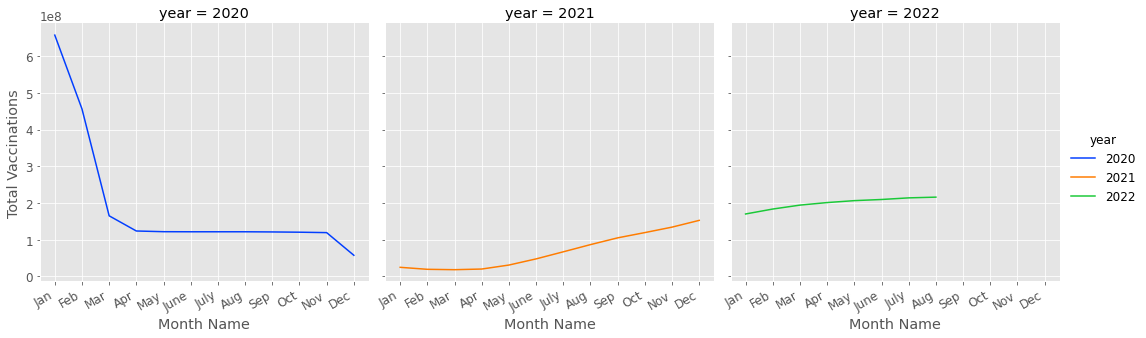

In [89]:
g3 = sns.relplot(
  data=df_vacc,
  x='month_name', y='total_vaccinations', ci=None,
  col='year', hue='year', palette='bright',
  kind='line'
)

g3.set(xlabel='Month Name', ylabel='Total Vaccinations')
g3.fig.autofmt_xdate()

# Demographics Exploration

In [90]:
demo_cols = ['iso_code', 'continent', 'location', 'date', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 
             'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 
             'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index','excess_mortality_cumulative_absolute', 
             'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million', 'year', 'month_num', 'month_name', 
             'day', 'day_name']

df_demo = df_filled[demo_cols]
df_demo.head()

iso_code continent     location       date  population  population_density  \
0      AFG      Asia  Afghanistan 2020-02-24  40099462.0              54.422   
1      AFG      Asia  Afghanistan 2020-02-25  40099462.0              54.422   
2      AFG      Asia  Afghanistan 2020-02-26  40099462.0              54.422   
3      AFG      Asia  Afghanistan 2020-02-27  40099462.0              54.422   
4      AFG      Asia  Afghanistan 2020-02-28  40099462.0              54.422   

   median_age  aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
0        18.6          2.581          1.337        1803.987              NaN   
1        18.6          2.581          1.337        1803.987              NaN   
2        18.6          2.581          1.337        1803.987              NaN   
3        18.6          2.581          1.337        1803.987              NaN   
4        18.6          2.581          1.337        1803.987              NaN   

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0                597.029                 9.59             NaN           NaN   
1                597.029                 9.59             NaN           NaN   
2                597.029                 9.59             NaN           NaN   
3                597.029                 9.59             NaN           NaN   
4                597.029                 9.59             NaN           NaN   

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                  37.746                         0.5            64.83   
1                  37.746                         0.5            64.83   
2                  37.746                         0.5            64.83   
3                  37.746                         0.5            64.83   
4                  37.746                         0.5            64.83   

   human_development_index  excess_mortality_cumulative_absolute  \
0                    0.511                                   NaN   
1                    0.511                                   NaN   
2                    0.511                                   NaN   
3                    0.511                                   NaN   
4                    0.511                                   NaN   

   excess_mortality_cumulative  excess_mortality  \
0                          NaN               NaN   
1                          NaN               NaN   
2                          NaN               NaN   
3                          NaN               NaN   
4                          NaN               NaN   

   excess_mortality_cumulative_per_million  year  month_num month_name  day  \
0                                      NaN  2020          2        Feb   24   
1                                      NaN  2020          2        Feb   25   
2                                      NaN  2020          2        Feb   26   
3                                      NaN  2020          2        Feb   27   
4                                      NaN  2020          2        Feb   28   

    day_name  
0     Monday  
1    Tuesday  
2  Wednesday  
3   Thursday  
4     Friday

In [91]:
df_demo[['population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
         'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 
         'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 
         'excess_mortality_cumulative_per_million']].describe()

population  population_density    median_age  aged_65_older  \
count  2.05387e+05        183861.00000  170367.00000   168566.00000   
mean   1.43224e+08           457.37376      30.64044        8.82111   
std    6.96157e+08          2109.06374       9.06506        6.13106   
min    4.70000e+01             0.13700      15.10000        1.14400   
25%    8.96007e+05            37.72800      22.30000        3.52600   
50%    7.49458e+06            88.12500      30.60000        6.70400   
75%    3.35739e+07           214.24300      39.10000       14.17800   
max    7.90930e+09         20546.76600      48.20000       27.04900   

       aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
count   169475.00000    169378.00000     110481.00000           169944.00000   
mean         5.56447     19601.92584         13.62768              260.96239   
std          4.16458     20564.13711         20.03479              119.92412   
min          0.52600       661.24000          0.10000               79.37000   
25%          2.06300      4449.89800          0.60000              170.05000   
50%          4.20900     12951.83900          2.20000              243.96400   
75%          8.67800     27936.89600         21.20000              329.94200   
max         18.49300    116935.60000         77.60000              724.41700   

       diabetes_prevalence  female_smokers  male_smokers  \
count         178374.00000    128538.00000  126777.00000   
mean               8.36598        10.65980      32.80069   
std                4.69459        10.60473      13.53263   
min                0.99000         0.10000       7.70000   
25%                5.31000         1.90000      21.60000   
50%                7.20000         6.30000      31.40000   
75%               10.59000        19.30000      41.30000   
max               30.53000        44.00000      78.10000   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count             83462.00000                151000.00000     193280.00000   
mean                 50.87703                     3.08497         73.64492   
std                  31.84734                     2.55108          7.44905   
min                   1.18800                     0.10000         53.28000   
25%                  20.85900                     1.30000         69.50000   
50%                  49.83900                     2.50000         75.05000   
75%                  82.50200                     4.00000         79.07000   
max                 100.00000                    13.80000         86.75000   

       human_development_index  excess_mortality_cumulative_absolute  \
count             165509.00000                           1.01792e+05   
mean                   0.72500                           3.31007e+04   
std                    0.14971                           9.35077e+04   
min                    0.39400                          -3.77261e+04   
25%                    0.60200                           7.39655e+01   
50%                    0.74300                           4.52791e+03   
75%                    0.84500                           1.91333e+04   
max                    0.95700                           1.21908e+06   

       excess_mortality_cumulative  excess_mortality  \
count                 101792.00000      101792.00000   
mean                       9.09062          15.75633   
std                       11.79650          14.32047   
min                      -28.45000         -95.92000   
25%                        1.25429           5.75074   
50%                        6.50591          12.80426   
75%                       14.20500          24.43828   
max                       76.55000         375.98000   

       excess_mortality_cumulative_per_million  
count                             101792.00000  
mean                                1009.92913  
std                                 1174.21114  
min                                -1694.14612  
25% 

In [92]:
df_demo.isna().sum()                                   # check missing values

iso_code                                        0
continent                                   11945
location                                        0
date                                            0
population                                   1228
population_density                          22754
median_age                                  36248
aged_65_older                               38049
aged_70_older                               37140
gdp_per_capita                              37237
extreme_poverty                             96134
cardiovasc_death_rate                       36671
diabetes_prevalence                         28241
female_smokers                              78077
male_smokers                                79838
handwashing_facilities                     123153
hospital_beds_per_thousand                  55615
life_expectancy                             13335
human_development_index                     41106
excess_mortality_cumulative_absolute       104823


<AxesSubplot:>

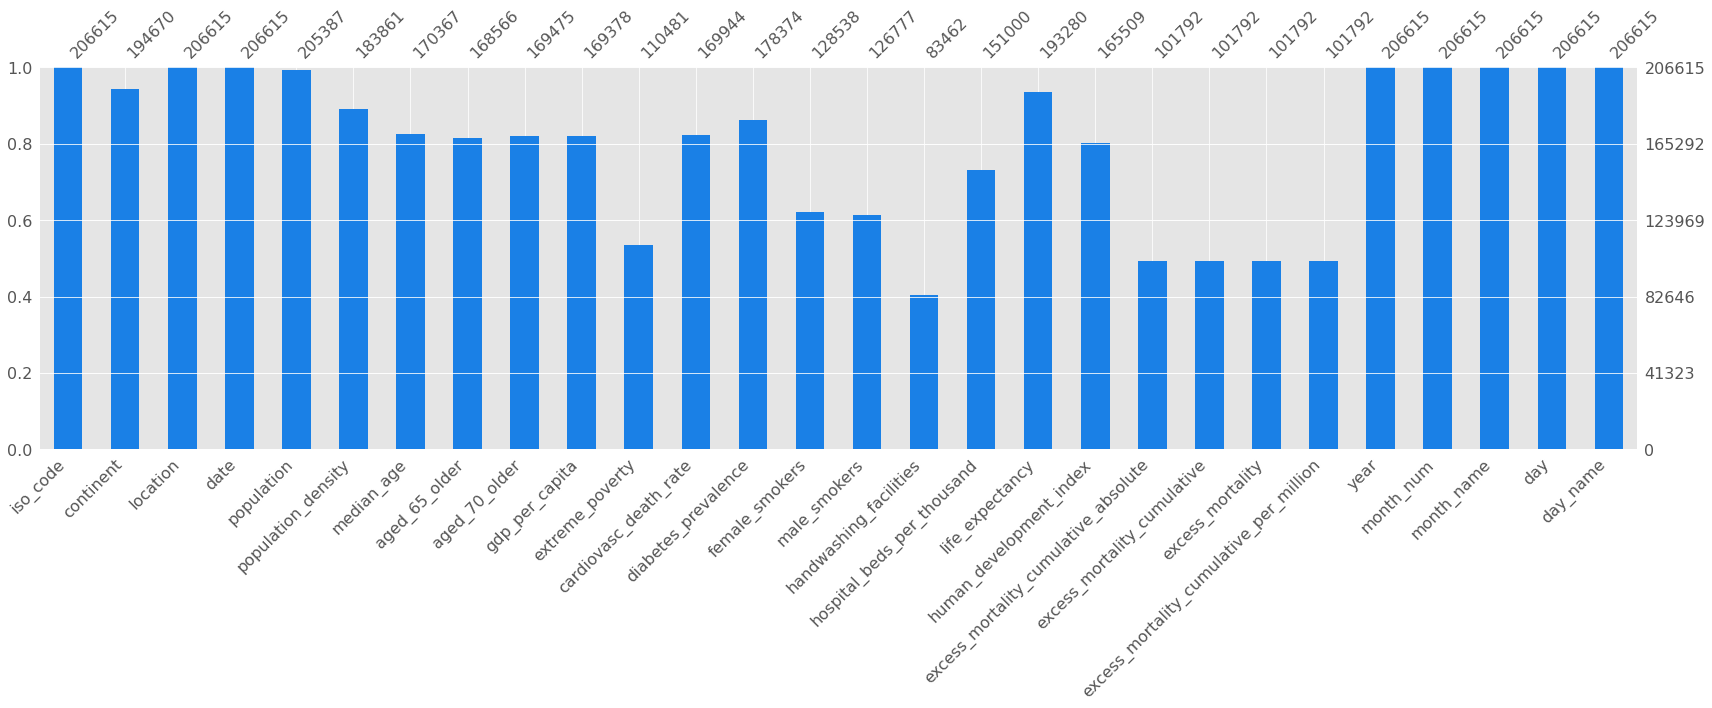

In [93]:
msno.bar(df_demo, labels=True, color=(0.1, 0.5, 0.9))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

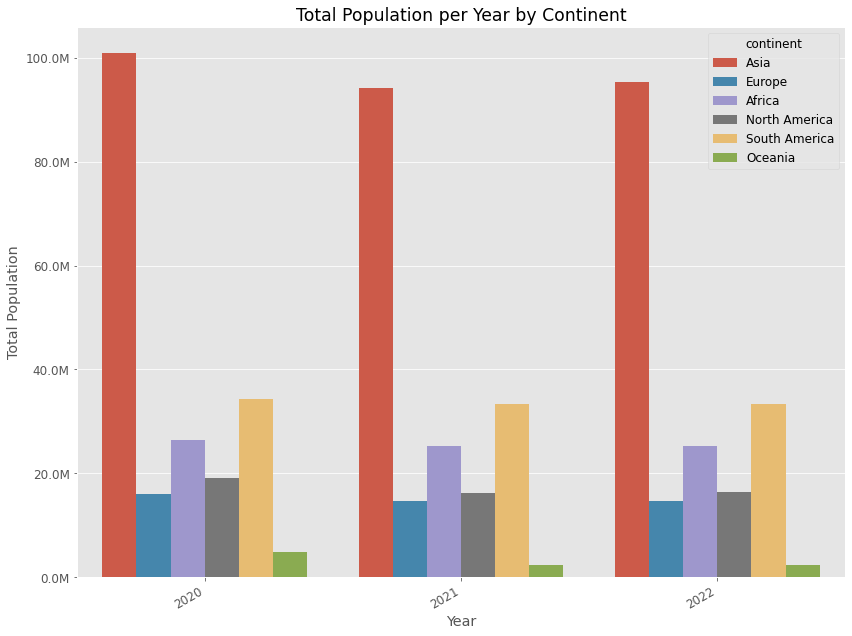

In [94]:
plot_bar(
    data=df_demo,
    x='year', y='population', hue='continent', 
    title='Total Population per Year by Continent', xlabel='Year', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

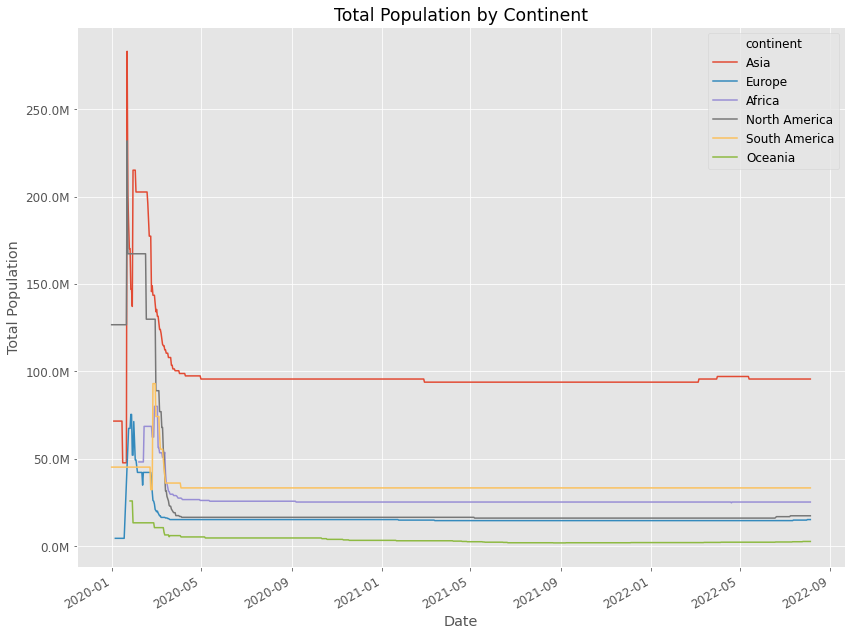

In [95]:
plot_line(
    data=df_demo,
    x='date', y='population', hue='continent', 
    title='Total Population by Continent', xlabel='Date', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

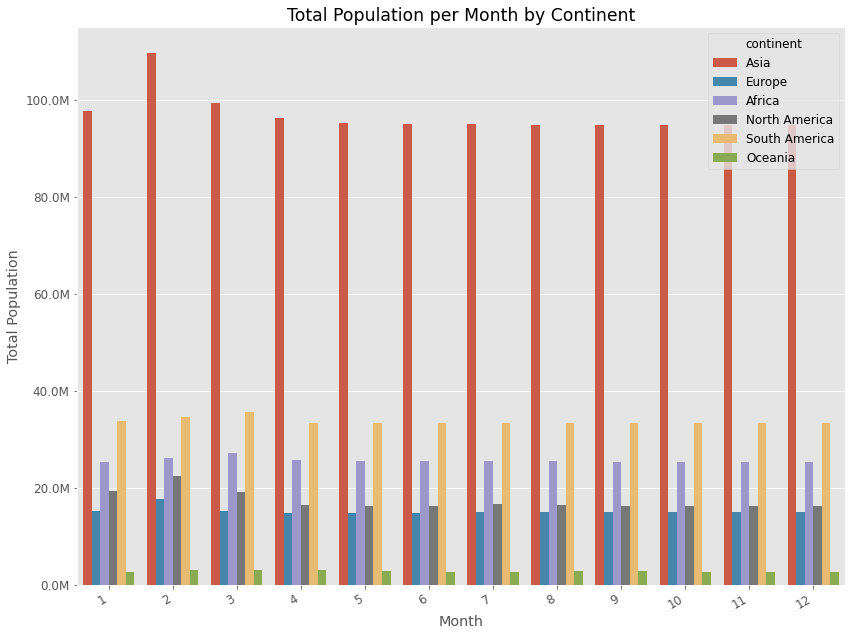

In [96]:
plot_bar(
    data=df_demo,
    x='month_num', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

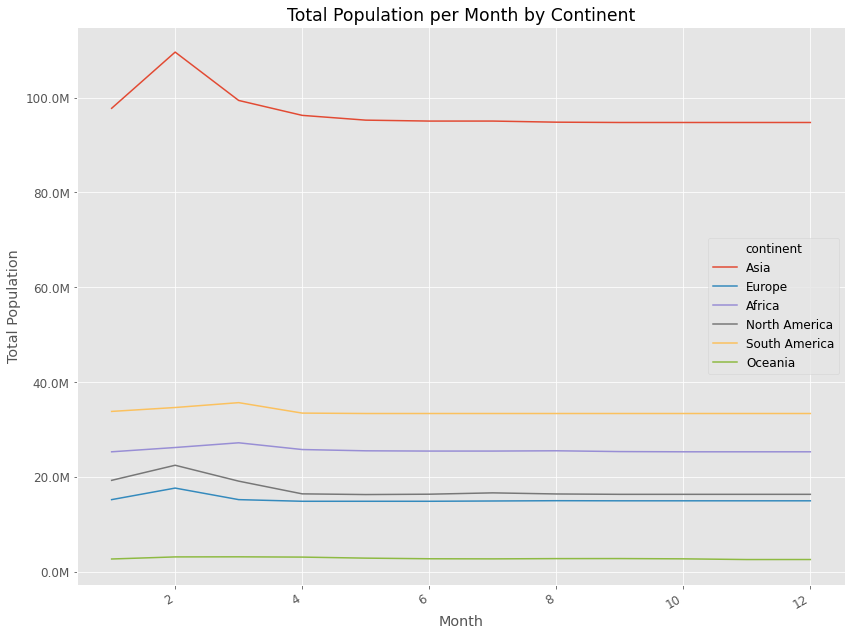

In [97]:
plot_line(
    data=df_demo,
    x='month_num', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

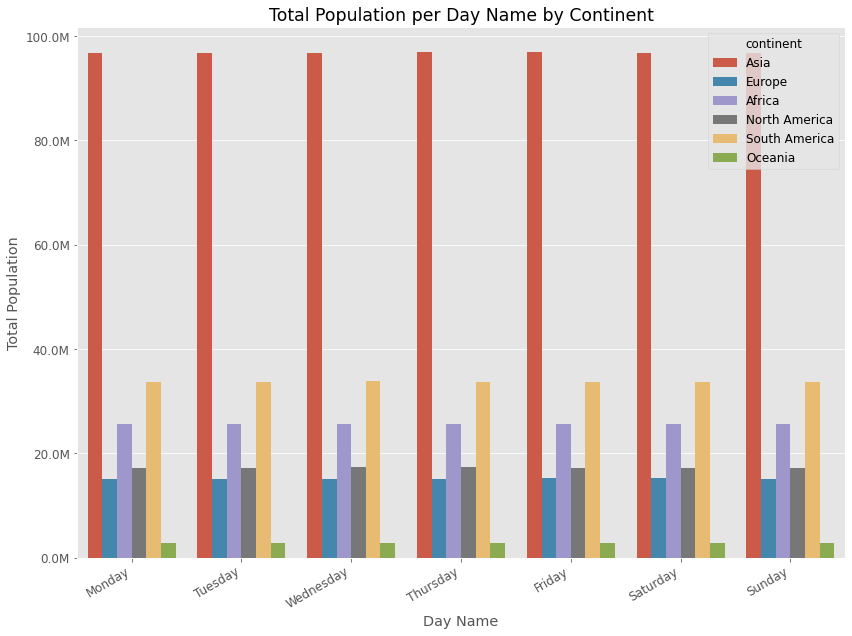

In [98]:
plot_bar(
    data=df_demo,
    x='day_name', y='population', hue='continent', 
    title='Total Population per Day Name by Continent', xlabel='Day Name', ylabel='Total Population', 
    formatter=format_mill
)

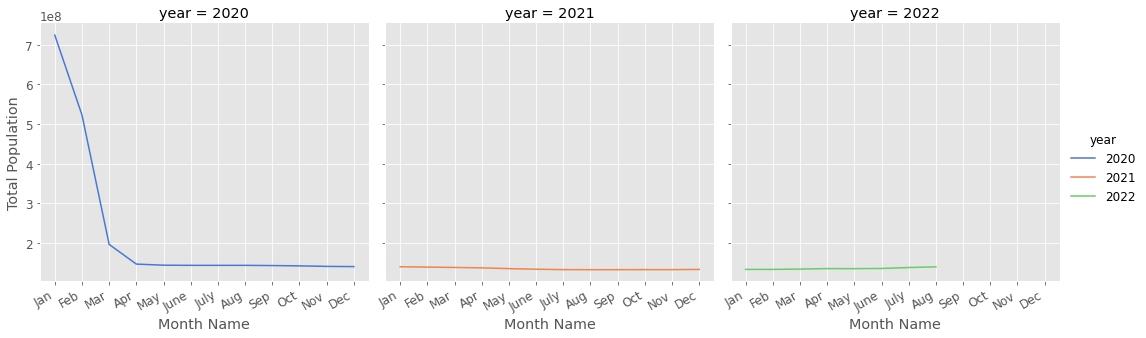

In [99]:
g4 = sns.relplot(
  data=df_demo,
  x='month_name', y='population', ci=None,
  col='year', hue='year', palette='muted',
  kind='line'
)

g4.set(xlabel='Month Name', ylabel='Total Population')
g4.fig.autofmt_xdate()

# Date Truncating or Indexing

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

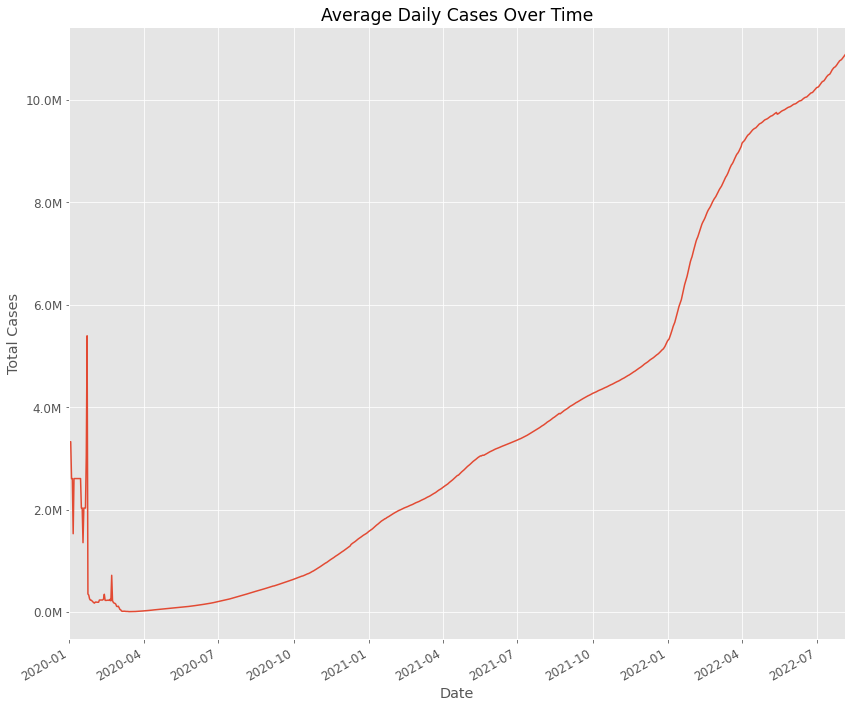

In [100]:
plot_date_rng(
    data=get_data(data=df_filled, rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Daily Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

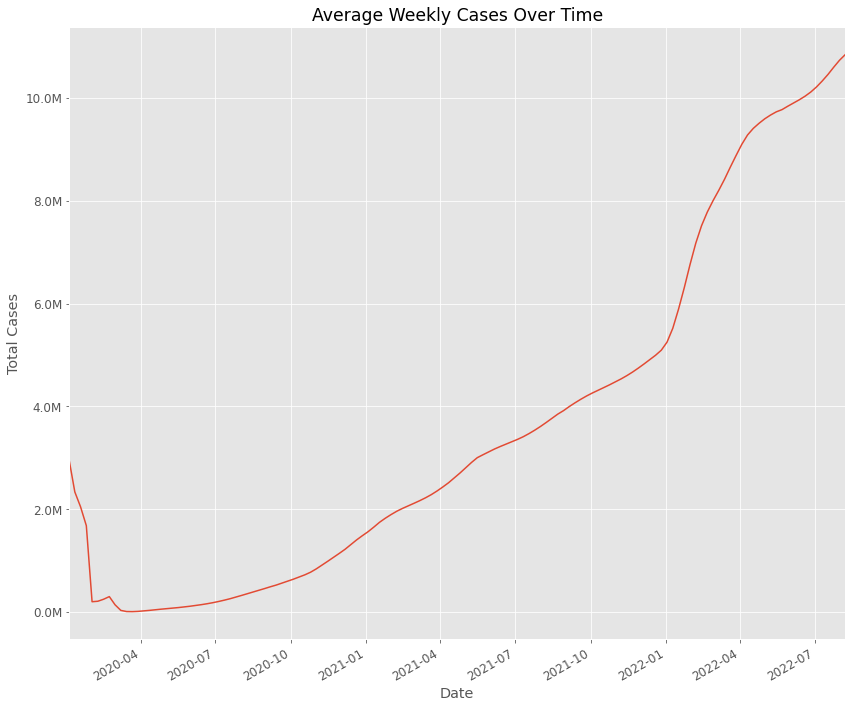

In [101]:
plot_date_rng(
    data=get_data(data=df_filled, rule='W').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Weekly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

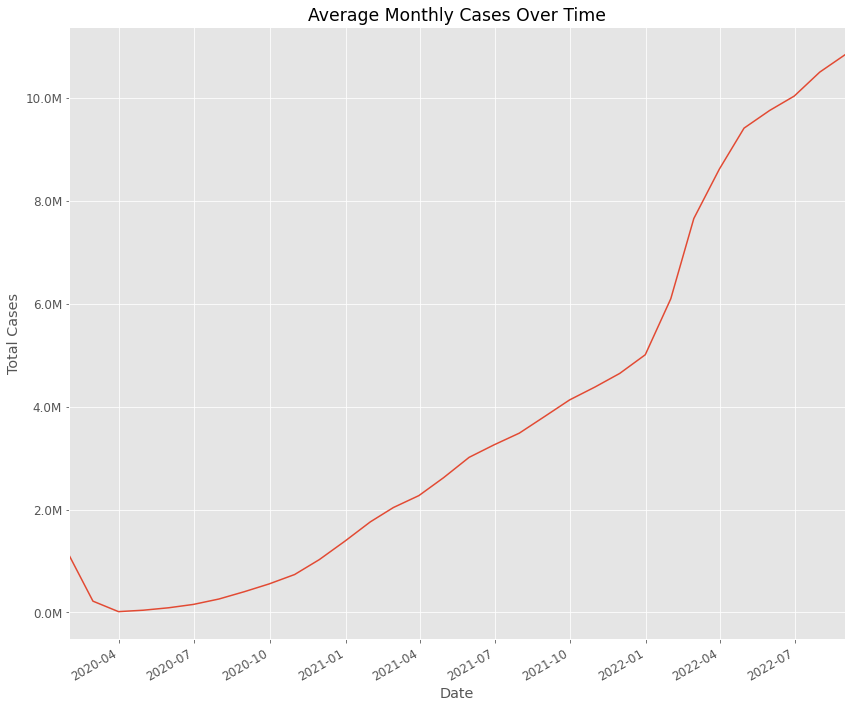

In [102]:
plot_date_rng(
    data=get_data(data=df_filled, rule='M').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Monthly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

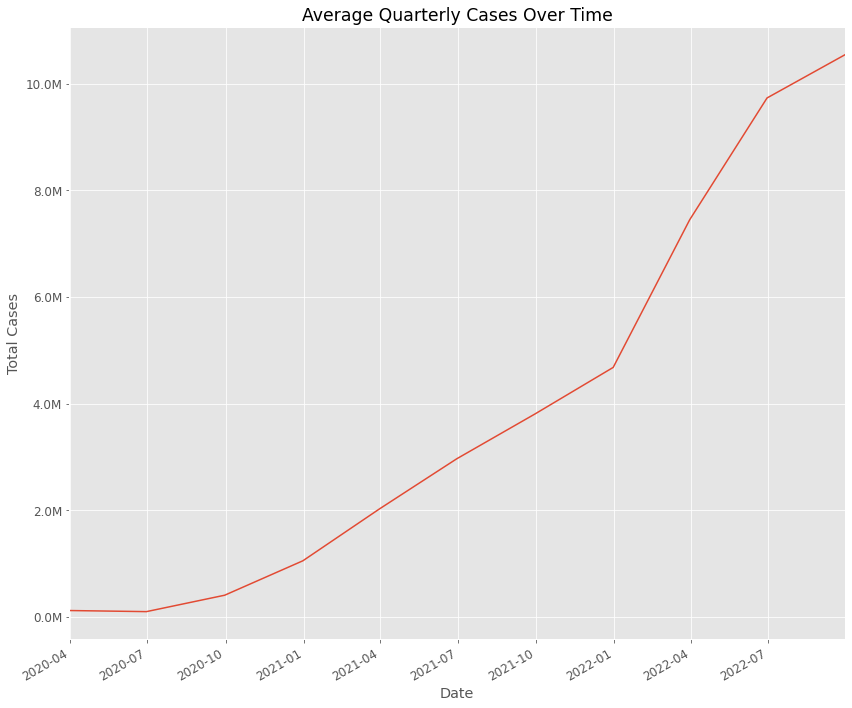

In [103]:
plot_date_rng(
    data=get_data(data=df_filled, rule='Q').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Quarterly Cases Over Time',
    formatter=format_mill
)

Plot Specific Date Range

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

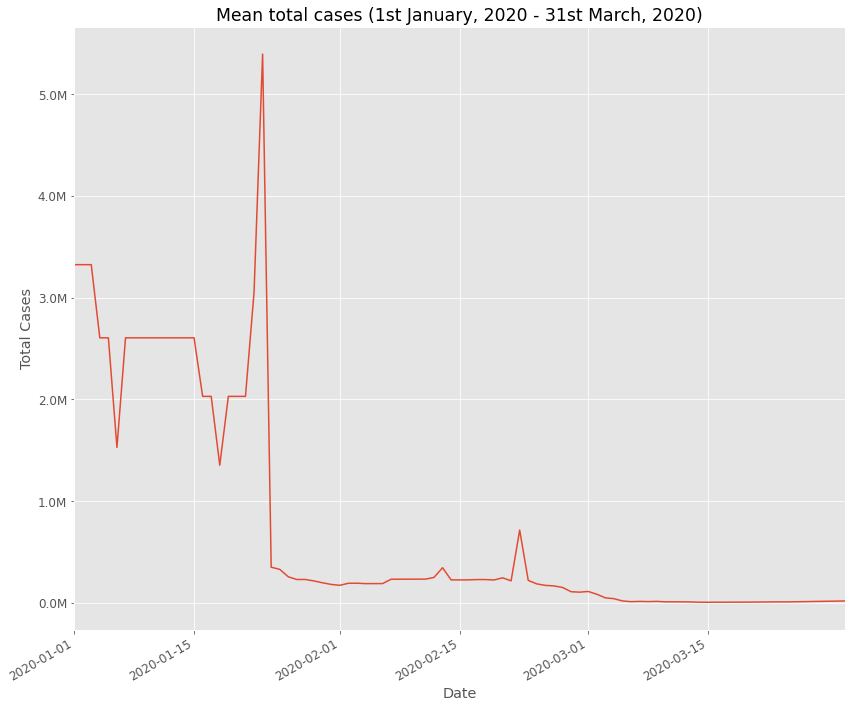

In [104]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-03-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st March, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

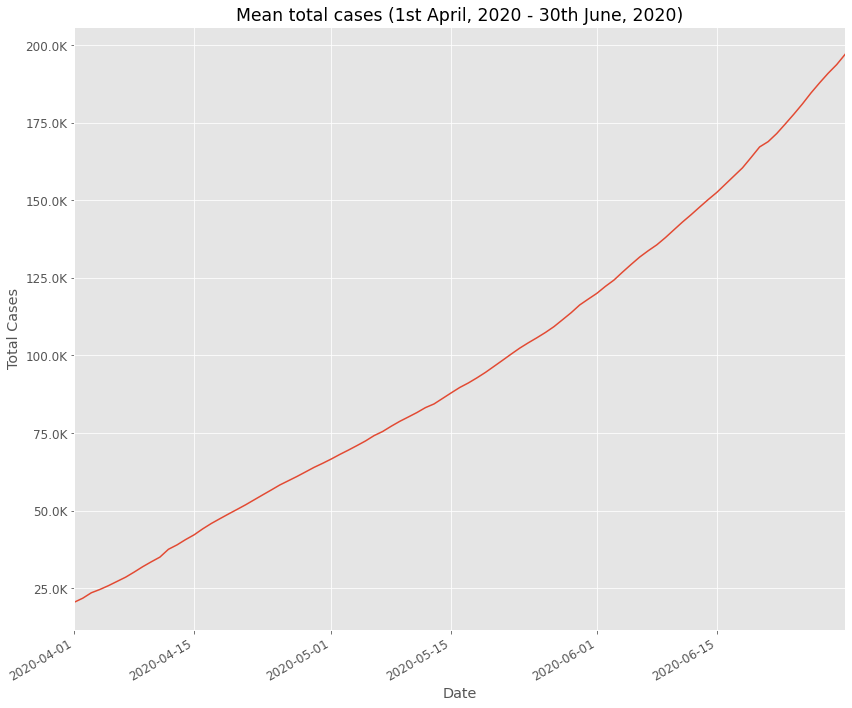

In [105]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-04-01', after='2020-06-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st April, 2020 - 30th June, 2020)',
    formatter=format_tsd
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

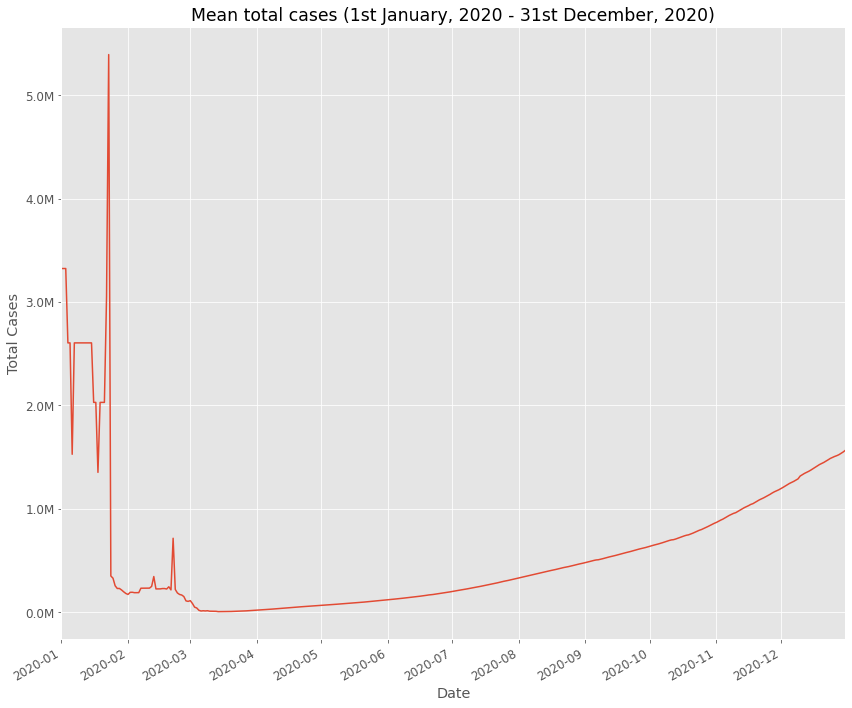

In [106]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st December, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

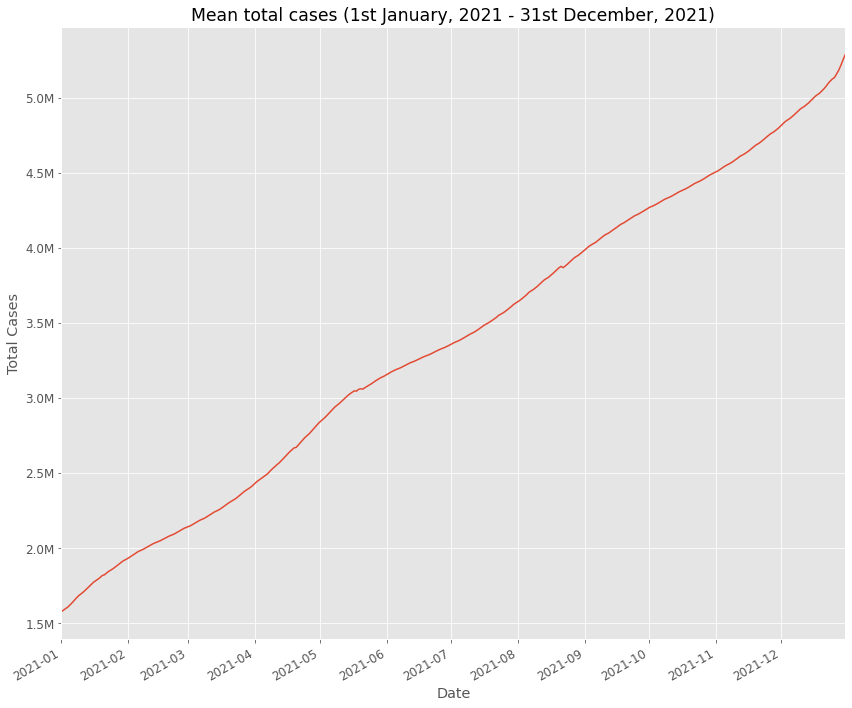

In [107]:
plot_date_rng(
    data=get_data(data=df_filled, before='2021-01-01', after='2021-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2021 - 31st December, 2021)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

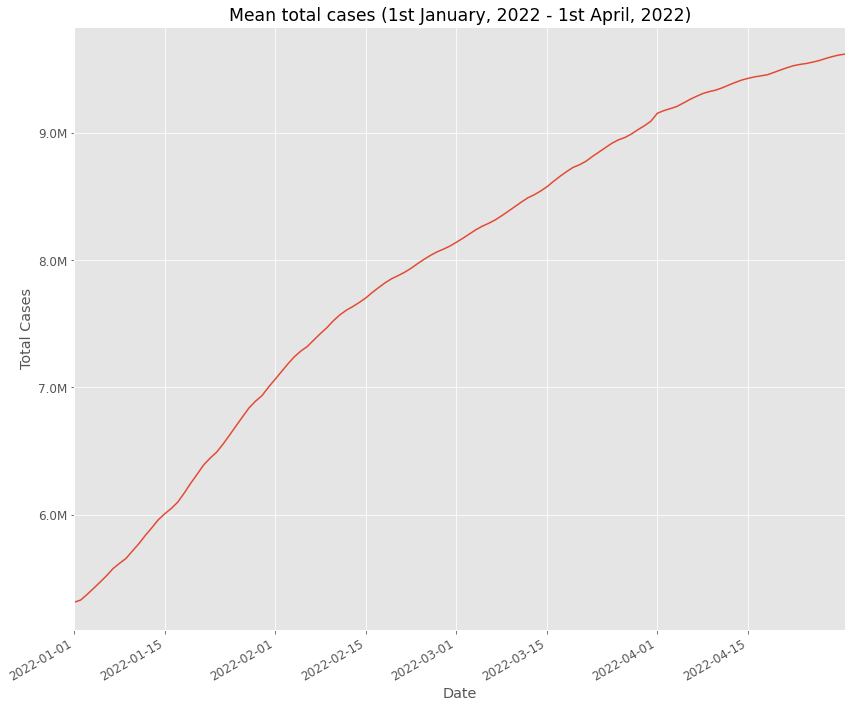

In [108]:
plot_date_rng(
    data=get_data(data=df_filled, before='2022-01-01', after='2022-04-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2022 - 1st April, 2022)',
    formatter=format_mill
)